In [ ]:
pip install tensorflow_addons --upgrade

     |████████████████████████████████| 1.1 MB 7.5 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='xxxxxxxxxxxx', 
                                    dest_path='./27-jan.zip',
                                    unzip=False)

In [ ]:
!unzip 27-jan.zip

Archive:  27-jan.zip
  inflating: battery_received.txt    
  inflating: data_received.txt       


In [ ]:
!ls

27-jan.zip  battery_received.txt  data_received.txt  drive  sample_data


In [ ]:
folder_name = 'APIN'

## Data Wrangling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_theme()
sns.set_context("paper", font_scale=1.7)

### Sensor data (Temp, Humidity, RSSI)

In [ ]:
df_sensor = pd.read_csv('data_received.txt')
df_sensor

ADDR          TIME  TID  TEMP   HUM  RSSI
0        6e6d651fbae3  1.573128e+09  203  1991  1119   -63
1        d8896dfe78e4  1.573128e+09  230  1871  1203   -47
2        352299f096d2  1.573128e+09  229  1943  1168   -43
3        e03dbb9965ed  1.573128e+09  226  3370   641   -81
4        c9dc1485bfd2  1.573128e+09  148  1867  1189   -62
...               ...           ...  ...   ...   ...   ...
1277635  b2bac19576cb  1.580143e+09   18  1579  1265   -60
1277636  61cc6cb2b2f8  1.580143e+09   37  2032  1006   -48
1277637  cb578dd18bce  1.580143e+09   70  2007  1414   -63
1277638  8af3d1337ee3  1.580143e+09   80  3945   484   -46
1277639  8dda80cf20c0  1.580143e+09  251  2822   699   -51

[1277640 rows x 6 columns]

In [ ]:
# List of ADDR's
df_sensor.ADDR.unique()

array(['6e6d651fbae3', 'd8896dfe78e4', '352299f096d2', 'e03dbb9965ed',
       'c9dc1485bfd2', 'a666402cc7e9', '2b3951d7d4e5', '621216cbcaef',
       '75284b4ab4f9', 'a11bc51cf0cc', '149f971bf5c6', 'ccd28aa193cf',
       '786d1ebbc2c4', '88f48d709fdc', 'b42beaa51dec', 'fe44df630cc9',
       'f0c1637bc7f7', 'b2bac19576cb', '80dfee69bfcb', '8dda80cf20c0',
       '291fb77414f6', '2ffd9d37a7e8', 'cbc218f165e9', '3a86ad3ac0cd',
       'bc3d9b569fc9', '61cc6cb2b2f8', '4ab8aaf5d0f9', '24f402b45cde',
       '69b774f031db', 'c5d81f77f0ed', 'acc8d5c002c3', '8af3d1337ee3',
       'cb578dd18bce', '7dc6e2194aec', '2bfcca8c64e4', '6fd7226a95dd',
       'c1476ee349ca'], dtype=object)

In [ ]:
groups = df_sensor.groupby('ADDR')  
groups_sensor = [groups.get_group(x) for x in groups.groups]
groups_sensor

[                 ADDR          TIME  TID  TEMP   HUM  RSSI
 10       149f971bf5c6  1.573128e+09  231  1971  1108   -74
 40       149f971bf5c6  1.573128e+09  232  2382  1284   -53
 71       149f971bf5c6  1.573128e+09  233  3426   686   -54
 102      149f971bf5c6  1.573128e+09  234  3623   606   -60
 135      149f971bf5c6  1.573128e+09  235  3784   560   -60
 ...               ...           ...  ...   ...   ...   ...
 1277532  149f971bf5c6  1.580143e+09   60  3601   492   -55
 1277554  149f971bf5c6  1.580143e+09   61  3571   495   -54
 1277576  149f971bf5c6  1.580143e+09   62  3562   496   -55
 1277598  149f971bf5c6  1.580143e+09   63  3555   497   -55
 1277620  149f971bf5c6  1.580143e+09   64  3579   498   -55
 
 [43212 rows x 6 columns],
                  ADDR          TIME  TID  TEMP   HUM  RSSI
 27       24f402b45cde  1.573128e+09  175  1792  1210   -52
 56       24f402b45cde  1.573128e+09  176  1792  1207   -53
 88       24f402b45cde  1.573128e+09  177  1789  1210   -53
 119      2

In [ ]:
groups_sensor[0]

ADDR          TIME  TID  TEMP   HUM  RSSI
10       149f971bf5c6  1.573128e+09  231  1971  1108   -74
40       149f971bf5c6  1.573128e+09  232  2382  1284   -53
71       149f971bf5c6  1.573128e+09  233  3426   686   -54
102      149f971bf5c6  1.573128e+09  234  3623   606   -60
135      149f971bf5c6  1.573128e+09  235  3784   560   -60
...               ...           ...  ...   ...   ...   ...
1277532  149f971bf5c6  1.580143e+09   60  3601   492   -55
1277554  149f971bf5c6  1.580143e+09   61  3571   495   -54
1277576  149f971bf5c6  1.580143e+09   62  3562   496   -55
1277598  149f971bf5c6  1.580143e+09   63  3555   497   -55
1277620  149f971bf5c6  1.580143e+09   64  3579   498   -55

[43212 rows x 6 columns]

### Battery Data

In [ ]:
df_batt = pd.read_csv('battery_received.txt')
df_batt

ADDR          TIME  TID  BATTERY
0        6e6d651fbae3  1.573128e+09  203     2800
1        d8896dfe78e4  1.573128e+09  230     2855
2        352299f096d2  1.573128e+09  229     2819
3        e03dbb9965ed  1.573128e+09  226     2653
4        c9dc1485bfd2  1.573128e+09  148     2855
...               ...           ...  ...      ...
1277630  80dfee69bfcb  1.580143e+09   36     1860
1277631  d8896dfe78e4  1.580143e+09   64     2148
1277632  2ffd9d37a7e8  1.580143e+09   39     2029
1277633  a11bc51cf0cc  1.580143e+09   78     1823
1277634  fe44df630cc9  1.580143e+09  250     2439

[1277635 rows x 4 columns]

In [ ]:
# List of ADDR's
df_batt.ADDR.unique()

array(['6e6d651fbae3', 'd8896dfe78e4', '352299f096d2', 'e03dbb9965ed',
       'c9dc1485bfd2', 'a666402cc7e9', '2b3951d7d4e5', '621216cbcaef',
       '75284b4ab4f9', 'a11bc51cf0cc', '149f971bf5c6', 'ccd28aa193cf',
       '786d1ebbc2c4', '88f48d709fdc', 'b42beaa51dec', 'fe44df630cc9',
       'f0c1637bc7f7', 'b2bac19576cb', '80dfee69bfcb', '8dda80cf20c0',
       '291fb77414f6', '2ffd9d37a7e8', 'cbc218f165e9', '3a86ad3ac0cd',
       'bc3d9b569fc9', '61cc6cb2b2f8', '4ab8aaf5d0f9', '24f402b45cde',
       '69b774f031db', 'c5d81f77f0ed', 'acc8d5c002c3', '8af3d1337ee3',
       'cb578dd18bce', '7dc6e2194aec', '2bfcca8c64e4', '6fd7226a95dd',
       'c1476ee349ca'], dtype=object)

In [ ]:
# Are equal the ADDRs from both datasets??
df_batt.ADDR.unique() == df_sensor.ADDR.unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
groups = df_batt.groupby('ADDR')  
groups_batt = [groups.get_group(x) for x in groups.groups]
groups_batt

[                 ADDR          TIME  TID  BATTERY
 10       149f971bf5c6  1.573128e+09  231     2858
 40       149f971bf5c6  1.573128e+09  232     2858
 71       149f971bf5c6  1.573128e+09  233     2858
 102      149f971bf5c6  1.573128e+09  234     2858
 135      149f971bf5c6  1.573128e+09  235     2858
 ...               ...           ...  ...      ...
 1277532  149f971bf5c6  1.580143e+09   60     1949
 1277554  149f971bf5c6  1.580143e+09   61     1949
 1277576  149f971bf5c6  1.580143e+09   62     1949
 1277598  149f971bf5c6  1.580143e+09   63     1949
 1277620  149f971bf5c6  1.580143e+09   64     1943
 
 [43212 rows x 4 columns],                  ADDR          TIME  TID  BATTERY
 27       24f402b45cde  1.573128e+09  175     2887
 56       24f402b45cde  1.573128e+09  176     2887
 88       24f402b45cde  1.573128e+09  177     2887
 119      24f402b45cde  1.573128e+09  178     2887
 151      24f402b45cde  1.573128e+09  179     2887
 ...               ...           ...  ...      ...
 12

In [ ]:
groups_batt[0]

ADDR          TIME  TID  BATTERY
10       149f971bf5c6  1.573128e+09  231     2858
40       149f971bf5c6  1.573128e+09  232     2858
71       149f971bf5c6  1.573128e+09  233     2858
102      149f971bf5c6  1.573128e+09  234     2858
135      149f971bf5c6  1.573128e+09  235     2858
...               ...           ...  ...      ...
1277532  149f971bf5c6  1.580143e+09   60     1949
1277554  149f971bf5c6  1.580143e+09   61     1949
1277576  149f971bf5c6  1.580143e+09   62     1949
1277598  149f971bf5c6  1.580143e+09   63     1949
1277620  149f971bf5c6  1.580143e+09   64     1943

[43212 rows x 4 columns]

### Merge Data

In [ ]:
merged_groups = {} 
for i in range(len(df_batt.ADDR.unique())):
    #VERSION TO USE ONLY TEMP AND HUMIDITY
    #Group Sensor
    groups_sensor_merge = groups_sensor[i].copy()
    #Group Batt
    groups_batt_merge = groups_batt[i].copy()
    
    #Drop first and last values
    n_delete = 60
    groups_sensor_merge.drop(groups_sensor_merge.head(n_delete).index, inplace=True)
    groups_sensor_merge.drop(groups_sensor_merge.tail(n_delete).index, inplace=True)
    groups_batt_merge.drop(groups_batt_merge.head(n_delete).index, inplace=True)
    groups_batt_merge.drop(groups_batt_merge.tail(n_delete).index, inplace=True)
    
    #Fix different lengths
    # REPLACE WITH A TID-BASED FIX IN THE FUTURE IF NEEDED
    if len(groups_sensor_merge) > len(groups_batt_merge):
        groups_sensor_merge.drop(groups_sensor_merge.head(1).index, inplace=True)
    elif len(groups_sensor_merge) < len(groups_batt_merge):
        groups_batt_merge.drop(groups_batt_merge.head(1).index, inplace=True)
    
    #Subsample 1:10
    groups_sensor_merge = groups_sensor_merge.iloc[::10]
    groups_sensor_merge = groups_sensor_merge.reset_index(drop=True)
    groups_batt_merge = groups_batt_merge.iloc[::10]
    groups_batt_merge = groups_batt_merge.reset_index(drop=True)

    print(f'Groups {i}:')
    groups_sensor_merge = groups_sensor_merge.drop(columns=['TIME', 'TID', 'RSSI'])
    addr_sensor = groups_sensor_merge['ADDR'].iloc[0]
    print(f'ADDR sensor: {addr_sensor} | len: {groups_sensor_merge.shape}')
    
    #groups_batt_merge = groups_batt_merge.drop(columns=['TIME', 'TID'])
    addr_batt = groups_batt_merge['ADDR'].iloc[0]
    print(f'ADDR batt:   {addr_batt} | len: {groups_batt_merge.shape}')
       
    #Merge
    groups_merge = groups_sensor_merge.copy()
    groups_sensor_merge['TEMP'] = groups_sensor_merge['TEMP']/100
    groups_sensor_merge['HUM'] = groups_sensor_merge['HUM']/100
    print(f'Group merged shape:              {groups_sensor_merge.shape} \n')
    
    #Add to list
    merged_groups[i] = groups_sensor_merge
    
    
print(f'Len of dict of merged groups: {len(merged_groups)}')
print(f'Shape of first item of dict: {merged_groups[0].shape}')

Groups 0:
ADDR sensor: 149f971bf5c6 | len: (4310, 3)
ADDR batt:   149f971bf5c6 | len: (4310, 4)
Group merged shape:              (4310, 3) 

Groups 1:
ADDR sensor: 24f402b45cde | len: (4217, 3)
ADDR batt:   24f402b45cde | len: (4217, 4)
Group merged shape:              (4217, 3) 

Groups 2:
ADDR sensor: 291fb77414f6 | len: (3191, 3)
ADDR batt:   291fb77414f6 | len: (3191, 4)
Group merged shape:              (3191, 3) 

Groups 3:
ADDR sensor: 2b3951d7d4e5 | len: (4255, 3)
ADDR batt:   2b3951d7d4e5 | len: (4255, 4)
Group merged shape:              (4255, 3) 

Groups 4:
ADDR sensor: 2bfcca8c64e4 | len: (2524, 3)
ADDR batt:   2bfcca8c64e4 | len: (2524, 4)
Group merged shape:              (2524, 3) 

Groups 5:
ADDR sensor: 2ffd9d37a7e8 | len: (4310, 3)
ADDR batt:   2ffd9d37a7e8 | len: (4310, 4)
Group merged shape:              (4310, 3) 

Groups 6:
ADDR sensor: 352299f096d2 | len: (4309, 3)
ADDR batt:   352299f096d2 | len: (4309, 4)
Group merged shape:              (4309, 3) 

Groups 7:
ADD

In [ ]:
# Delete unwanted sensor
del merged_groups[32]
del merged_groups[25]
print(f'Len of dict of merged groups: {len(merged_groups)}')
print(merged_groups.keys())

Len of dict of merged groups: 35
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36])


### Exploratory Data Analysis

In [ ]:
concat_df = pd.concat(merged_groups.values(), ignore_index=True)

#### Plot data

In [ ]:
for j, sensor_df in enumerate(merged_groups.values()):
    headers = list(sensor_df)
    addr = str(sensor_df['ADDR'].iloc[0])
    print(f'Sensor nº {j} - {addr} - Shape: {sensor_df.shape}')
    for i in range(1, len(headers)):
        column = str(headers[i])
        fig, ax = plt.subplots(figsize=(8,2))
        fig.set_dpi(200.0)
        if i == 1:
          ax.set(ylabel='Temperature')
        else:
          ax.set(ylabel='Humidity')
        ax.set(xlabel='Samples (Time)')
        sns.lineplot(data=sensor_df[column], ax=ax).set(title=column + ' (' + addr + ')')
        plt.show()
    print('\n\n\n*******************************************')
    print('*******************************************')
    print('*******************************************\n\n\n')

Output hidden; open in https://colab.research.google.com to view.

#### Histograms

[Text(0.5, 1.0, 'Temperature Histogram')]

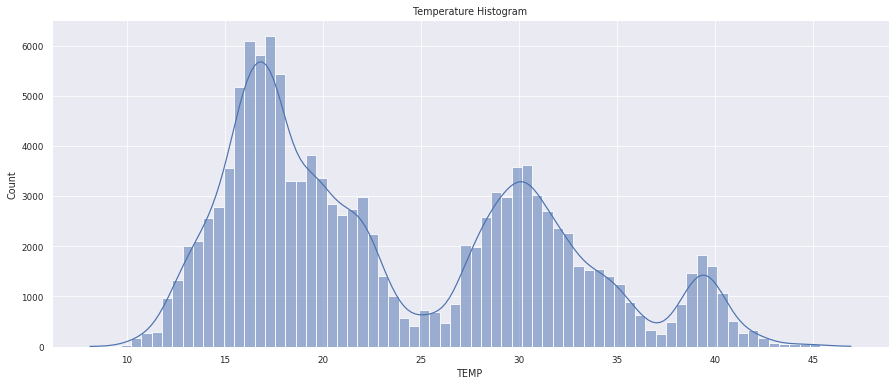

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(concat_df, x='TEMP', bins='auto', kde=True, legend=False).set(title='Temperature Histogram')

[Text(0.5, 1.0, 'Temperature Histograms')]

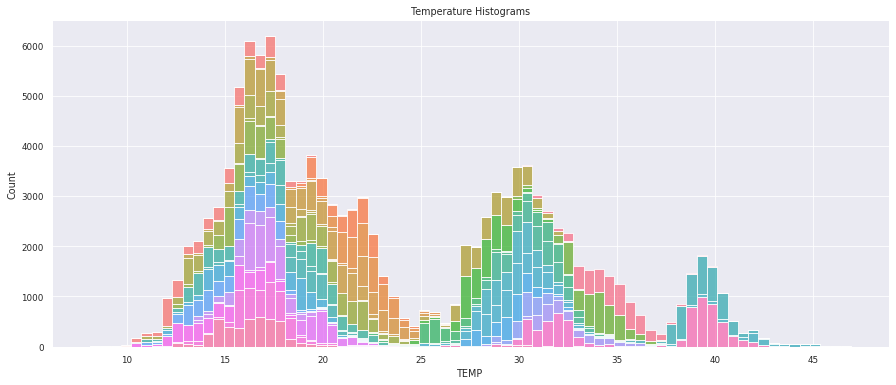

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(concat_df, x='TEMP', hue="ADDR", bins='auto', multiple='stack', legend=False).set(title='Temperature Histograms')

Max: 11.909999999999997
Min: -9.790000000000003


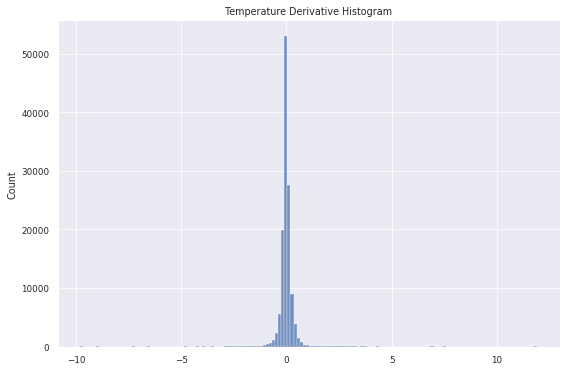

In [ ]:
series_diff = pd.Series(dtype='object')
for sensor_df in merged_groups.values():
  series_diff = series_diff.append(sensor_df['TEMP'].diff(), ignore_index=True)

nan_array = np.isnan(series_diff)
not_nan_array = ~ nan_array
series_diff_fix_temp = series_diff[not_nan_array]

plt.figure(figsize=(9,6))
sns.histplot(series_diff_fix_temp, bins=150, legend=False).set(title='Temperature Derivative Histogram')
print(f'Max: {np.amax(series_diff_fix_temp.to_numpy())}')
print(f'Min: {np.amin(series_diff_fix_temp.to_numpy())}')

-1.2064234987068077 1.2049997581088683


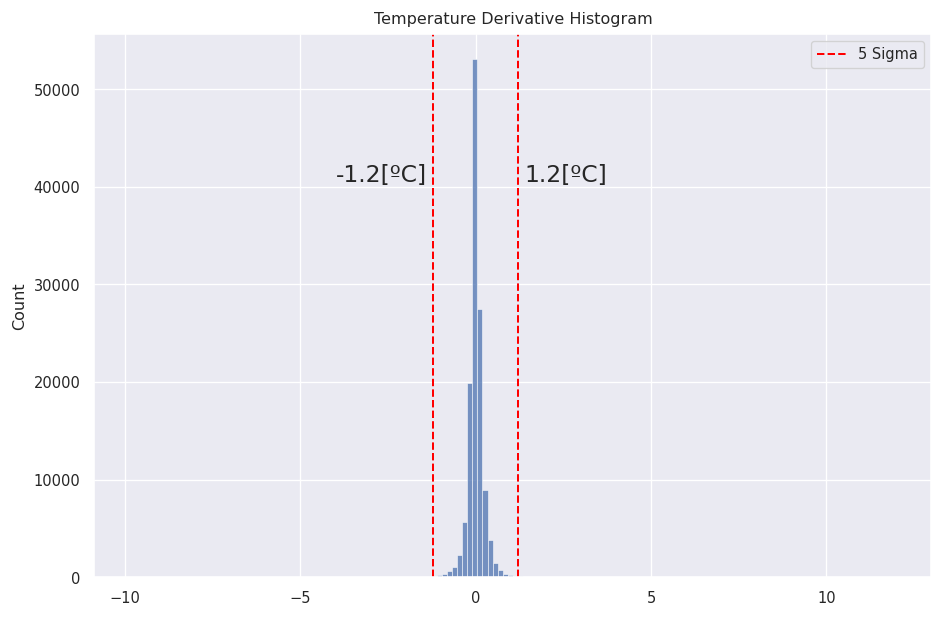

In [ ]:
series_diff = pd.Series(dtype='object')
for sensor_df in merged_groups.values():
  series_diff = series_diff.append(sensor_df['TEMP'].diff(), ignore_index=True)

nan_array = np.isnan(series_diff)
not_nan_array = ~ nan_array
series_diff_fix_temp = series_diff[not_nan_array]

temp_diff_mean = np.mean(series_diff_fix_temp.to_numpy())
temp_diff_5std = np.std(series_diff_fix_temp.to_numpy())*5
top_sigma = temp_diff_mean + temp_diff_5std
bottom_sigma = temp_diff_mean - temp_diff_5std

plt.figure(figsize=(9,6), dpi=120)
sns.histplot(series_diff_fix_temp, bins=150, legend=False).set(title='Temperature Derivative Histogram')
plt.axvline(top_sigma, color='red', linestyle='--')
plt.axvline(bottom_sigma, color='red', linestyle='--')
plt.text(1.4,40500,"1.2[ºC]", fontsize=14)
plt.text(-4,40500,"-1.2[ºC]", fontsize=14)
plt.legend(['5 Sigma'])
print(bottom_sigma, top_sigma)

[Text(0.5, 1.0, 'Humidity Histogram')]

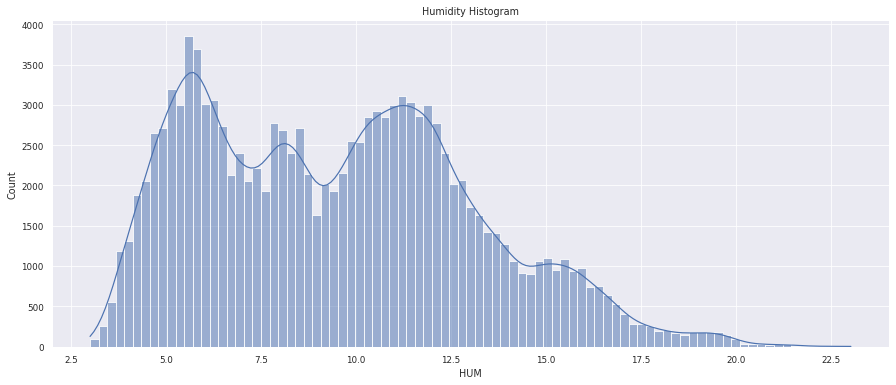

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(concat_df, x='HUM', bins='auto', kde=True, legend=False).set(title='Humidity Histogram')

[Text(0.5, 1.0, 'Humidity Histograms')]

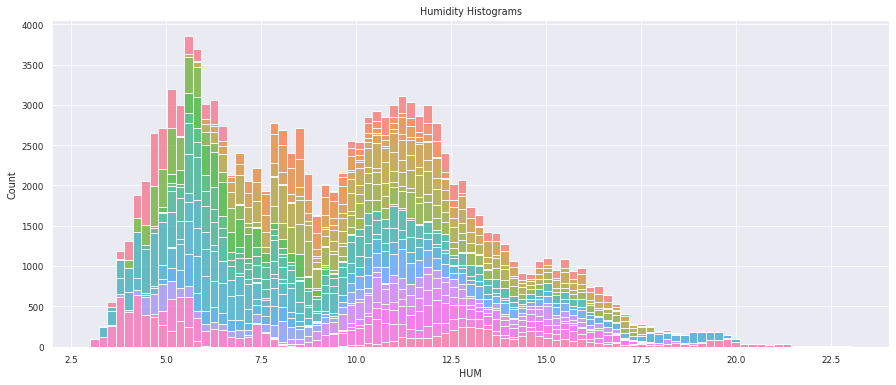

In [ ]:
plt.figure(figsize=(15,6))
sns.histplot(concat_df, x='HUM', bins='auto', hue='ADDR', multiple='stack', legend=False).set(title='Humidity Histograms')

Max: 2.639999999999999
Min: -3.59


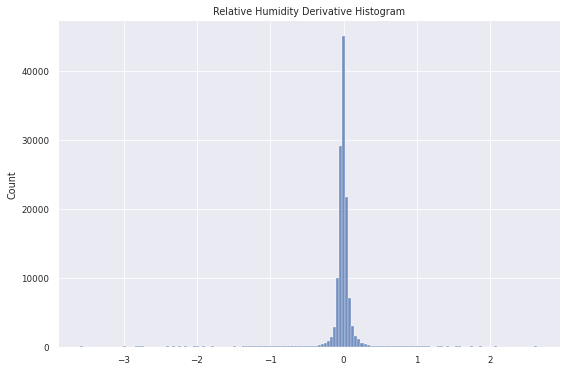

In [ ]:
series_diff = pd.Series(dtype='object')
for sensor_df in merged_groups.values():
  series_diff = series_diff.append(sensor_df['HUM'].diff(), ignore_index=True)

nan_array = np.isnan(series_diff)
not_nan_array = ~ nan_array
series_diff_fix = series_diff[not_nan_array]

plt.figure(figsize=(9,6))
sns.histplot(series_diff_fix, bins=150, legend=False).set(title='Relative Humidity Derivative Histogram')
print(f'Max: {np.amax(series_diff_fix.to_numpy())}')
print(f'Min: {np.amin(series_diff_fix.to_numpy())}')

-0.44817735516190466 0.4482261826696475


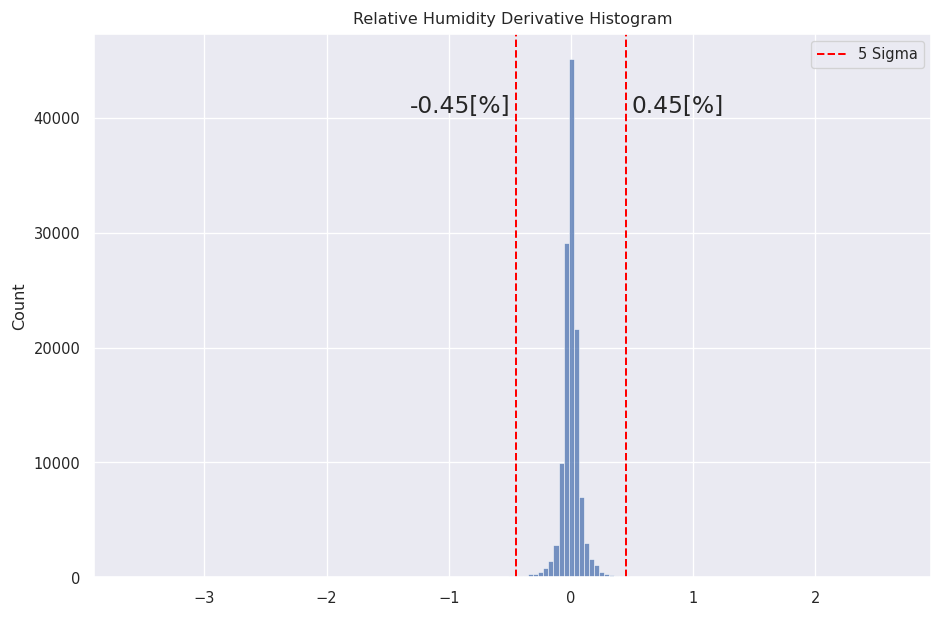

In [ ]:
series_diff = pd.Series(dtype='object')
for sensor_df in merged_groups.values():
  series_diff = series_diff.append(sensor_df['HUM'].diff(), ignore_index=True)

nan_array = np.isnan(series_diff)
not_nan_array = ~ nan_array
series_diff_fix = series_diff[not_nan_array]

humid_diff_mean = np.mean(series_diff_fix.to_numpy())
humid_diff_5std = np.std(series_diff_fix.to_numpy())*5
top_sigma = humid_diff_mean + humid_diff_5std
bottom_sigma = humid_diff_mean - humid_diff_5std

plt.figure(figsize=(9,6), dpi=120)
sns.histplot(series_diff_fix, bins=150, legend=False).set(title='Relative Humidity Derivative Histogram')
plt.axvline(top_sigma, color='red', linestyle='--')
plt.axvline(bottom_sigma, color='red', linestyle='--')
plt.text(0.5,40500,"0.45[%]", fontsize=14)
plt.text(-1.32,40500,"-0.45[%]", fontsize=14)
plt.legend(['5 Sigma'])
print(bottom_sigma, top_sigma)

#### Correlations

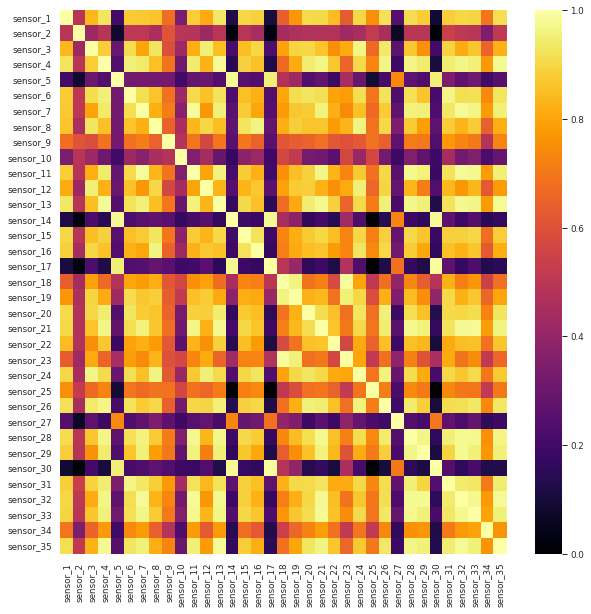

In [ ]:
corr_df_temp = pd.DataFrame()
for i, sensor_map in enumerate(merged_groups.values()):
  data = np.array(sensor_map.drop(columns=['ADDR']))
  data_temp = data[:1773,0]
  name = 'sensor_'+str(i+1)
  corr_df_temp[name]=data_temp
plt.figure(figsize=(10,10))
sns.heatmap(corr_df_temp.corr(), vmin=0, vmax=1, cmap='inferno' ,annot=False, linewidths=0)


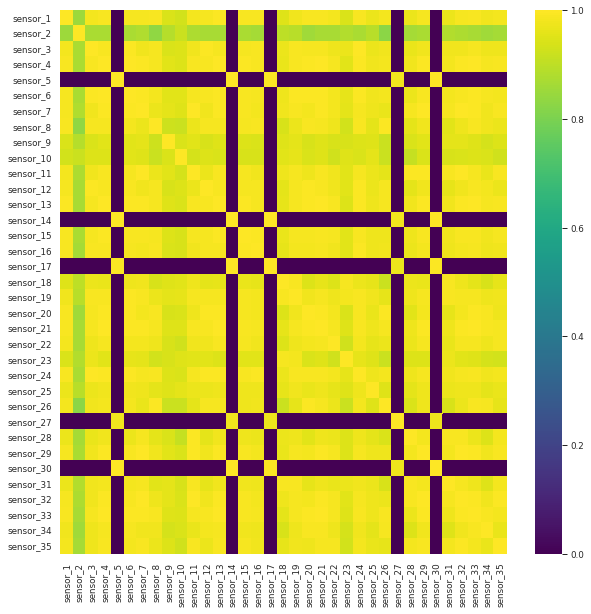

In [ ]:
corr_df_humid = pd.DataFrame()
for i, sensor_map in enumerate(merged_groups.values()):
  data = np.array(sensor_map.drop(columns=['ADDR']))
  data_temp = data[:1773,1]
  name = 'sensor_'+str(i+1)
  corr_df_humid[name]=data_temp
plt.figure(figsize=(10,10))
sns.heatmap(corr_df_humid.corr(), vmin=0, vmax=1, cmap='viridis' ,annot=False, linewidths=0)

In [ ]:
corr_pearson = concat_df['TEMP'].corr(concat_df['HUM'])
print(f'Pearson correlation: {corr_pearson}')

Pearson correlation: -0.7849203254734163


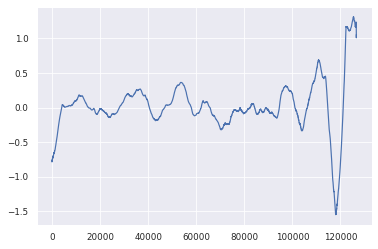

In [ ]:
from statsmodels import tsa
cross_correlation = tsa.stattools.ccf(x=concat_df['TEMP'], y=concat_df['HUM'])
plt.plot(cross_correlation)

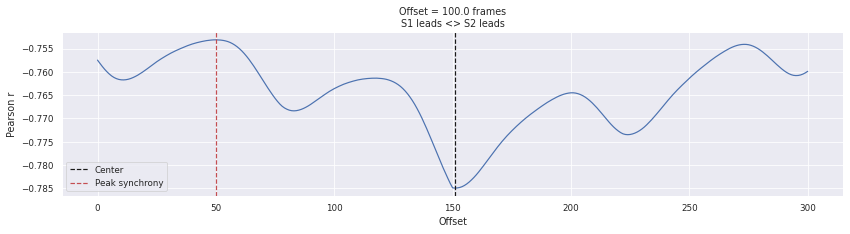

In [ ]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = concat_df['TEMP']
d2 = concat_df['HUM']
seconds = 5
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads', xlabel='Offset',ylabel='Pearson r')
plt.legend()

#### Scatter Plot


[Text(0.5, 1.0, 'Humidity vs. Temperature')]

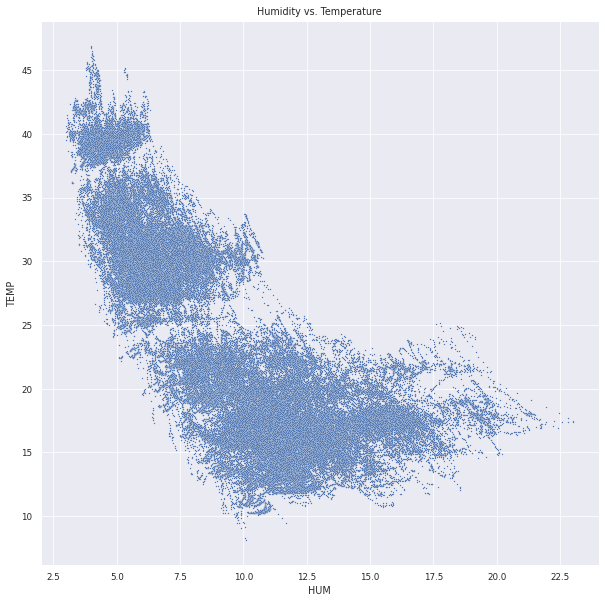

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='HUM', y='TEMP', data=concat_df, s=2).set(title='Humidity vs. Temperature')

[Text(0.5, 1.0, 'Humidity vs. Temperature')]

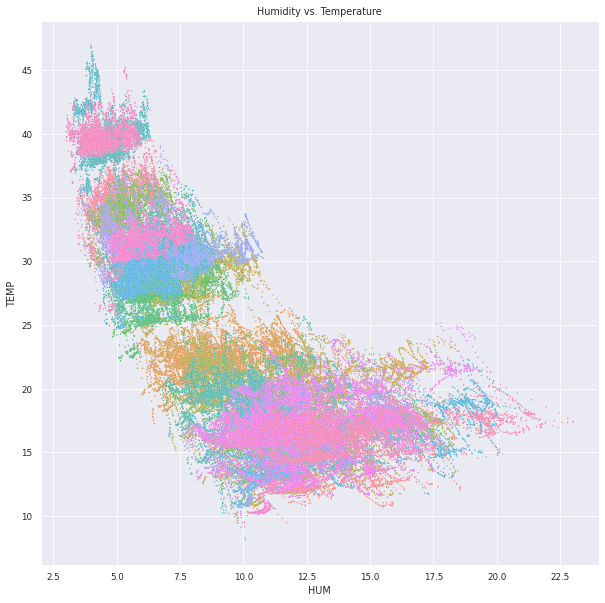

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='HUM', y='TEMP', data=concat_df, hue='ADDR',legend=False, s=2).set(title='Humidity vs. Temperature')

In [ ]:
fig_kde = sns.jointplot(data=concat_df, x='HUM', y='TEMP',  kind='kde', height=8, fill=True)
fig_kde.set_axis_labels(xlabel="Humidity [%]", ylabel = "Temperature [ºC]")

In [ ]:
sns.jointplot(data=concat_df, x='HUM', y='TEMP', s=1.8, height=10)

<Figure size 720x720 with 0 Axes>

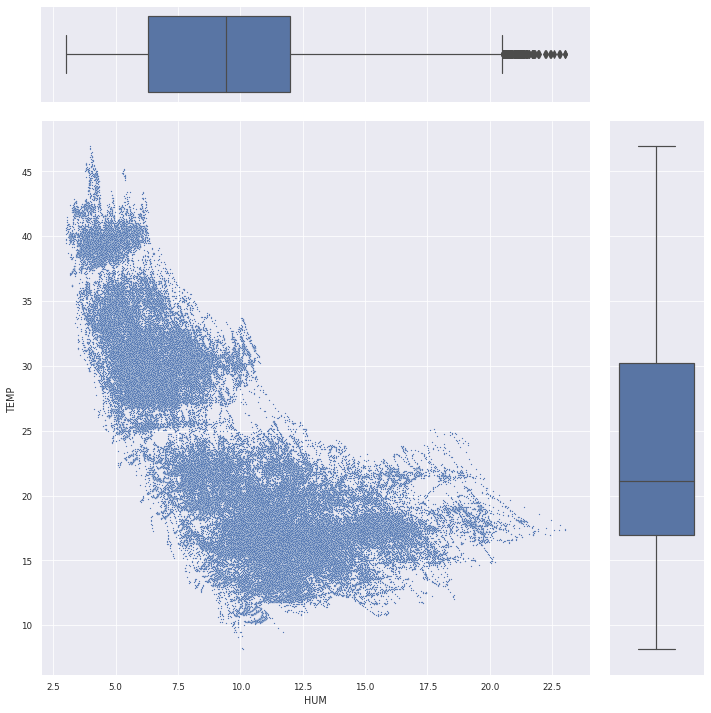

In [ ]:
plt.figure(figsize=(10,10))
g = sns.JointGrid(data=concat_df, x='HUM', y='TEMP', height=10)
g.plot_joint(sns.scatterplot, s=1.8)
g.plot_marginals(sns.boxplot)

In [ ]:
plt.figure(figsize=(8,8))
for sensor_df in merged_groups.values():
  sns.scatterplot(x=series_diff_fix, y=series_diff_fix_temp, s=7).set(title='Derivative Humidity vs. Derivative Temperature', 
                                                                                  xlabel='Derivative HUM',
                                                                                  ylabel='Detivative TEMP')

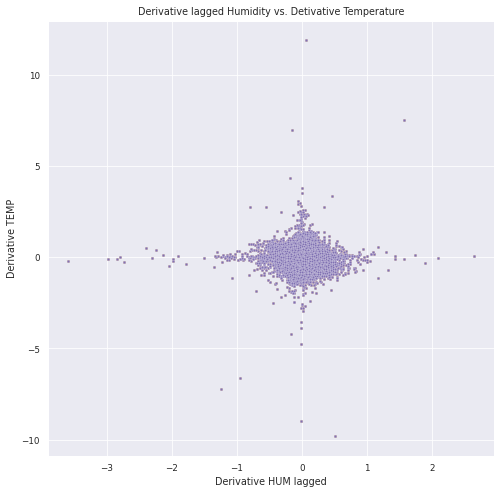

In [ ]:
plt.figure(figsize=(8,8))
for sensor_df in merged_groups.values():
  sns.scatterplot(x=series_diff_fix.shift(1), y=series_diff_fix_temp, s=7).set(title='Derivative lagged Humidity vs. Detivative Temperature', 
                                                                                  xlabel='Derivative HUM lagged',
                                                                                  ylabel='Derivative TEMP')

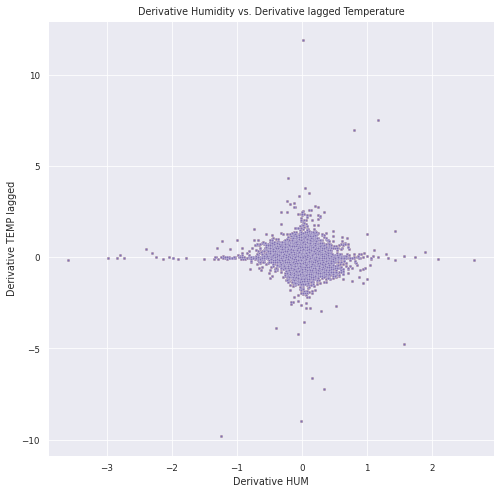

In [ ]:
plt.figure(figsize=(8,8))
for sensor_df in merged_groups.values():
  sns.scatterplot(x=series_diff_fix, y=series_diff_fix_temp.shift(1), s=7).set(title='Derivative Humidity vs. Derivative lagged Temperature', 
                                                                                  xlabel='Derivative HUM',
                                                                                  ylabel='Derivative TEMP lagged')

#### Autocorrelation & Partial Aucorrelation

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (T

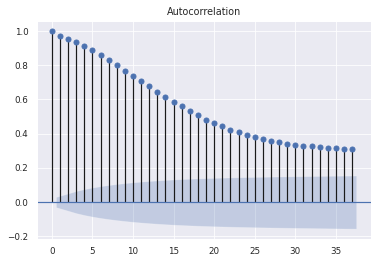

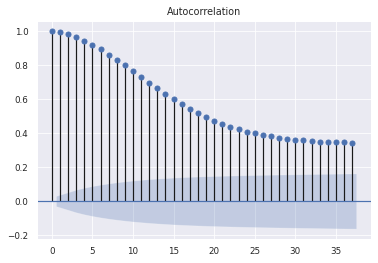

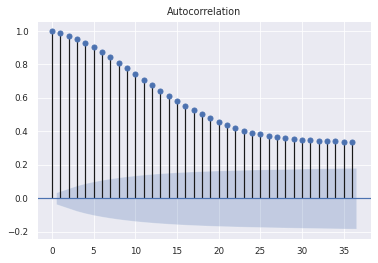

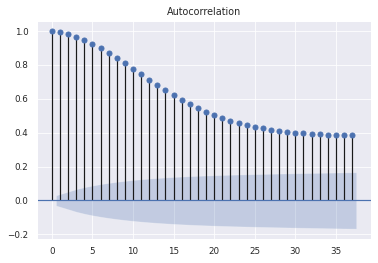

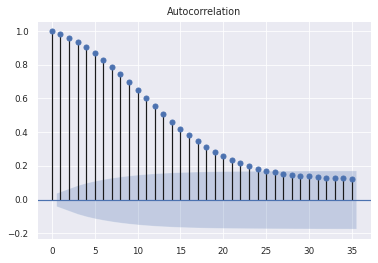

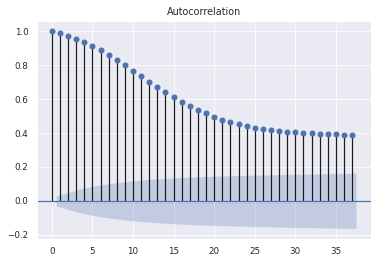

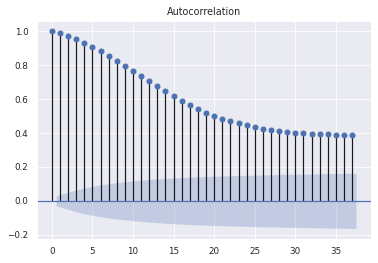

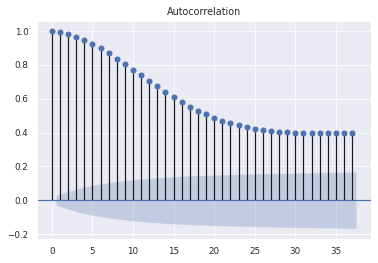

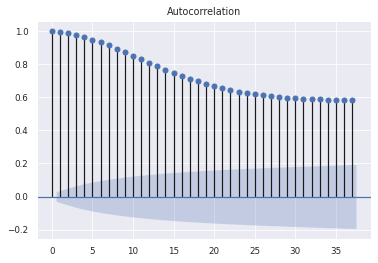

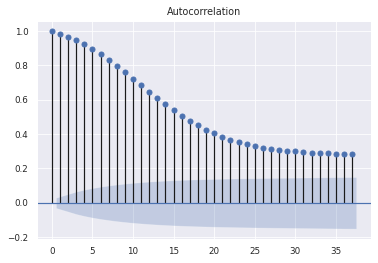

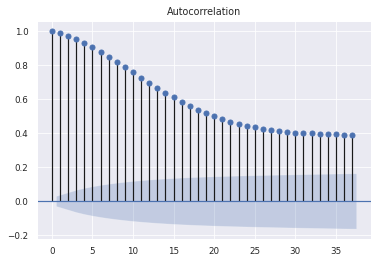

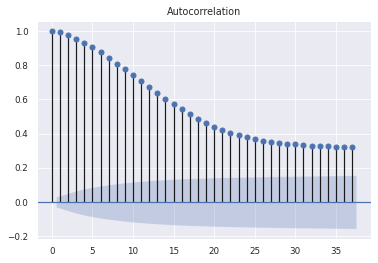

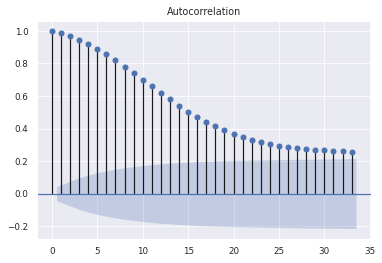

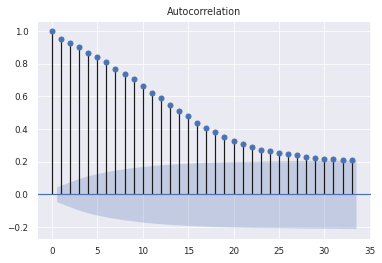

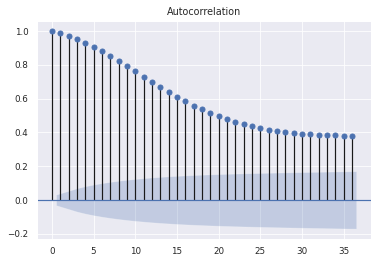

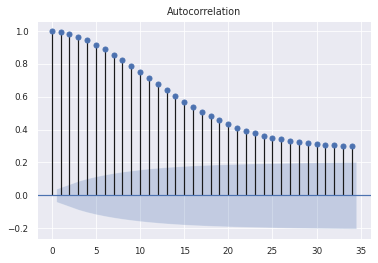

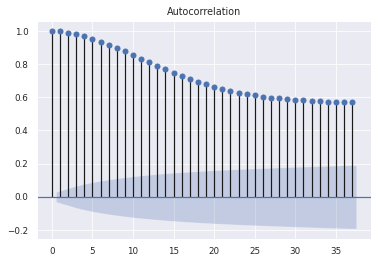

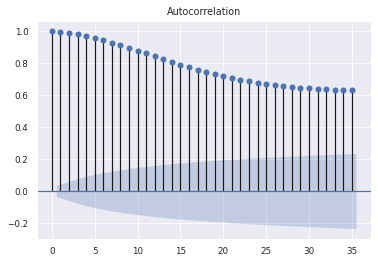

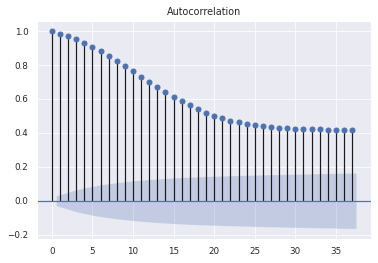

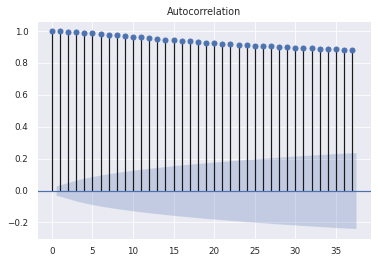

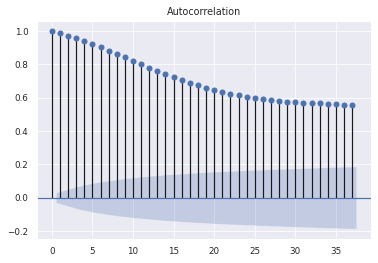

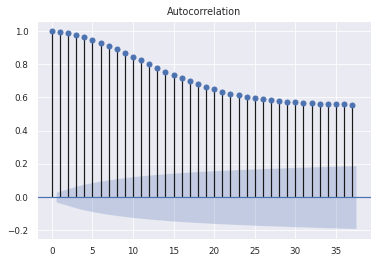

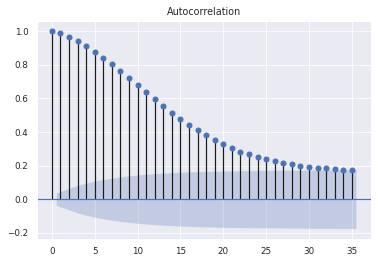

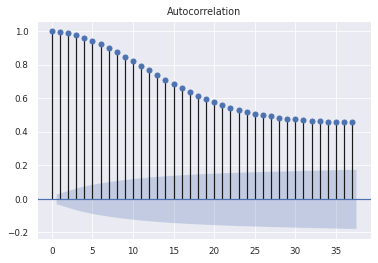

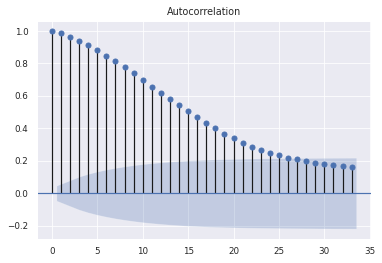

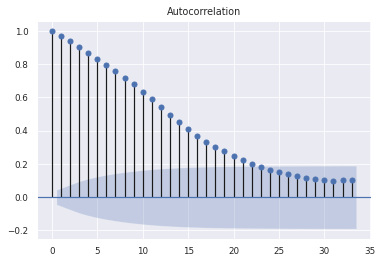

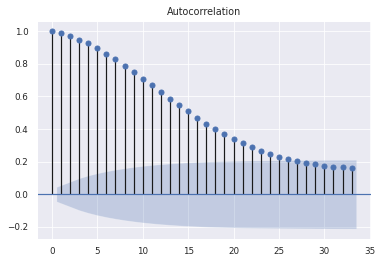

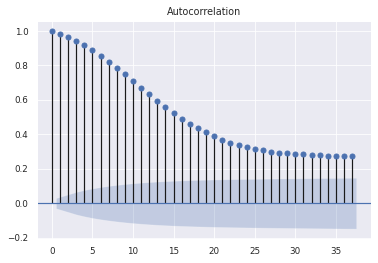

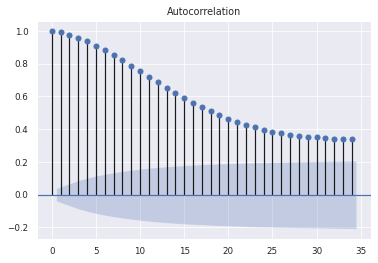

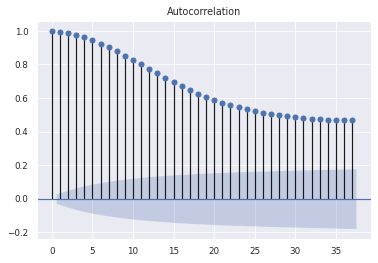

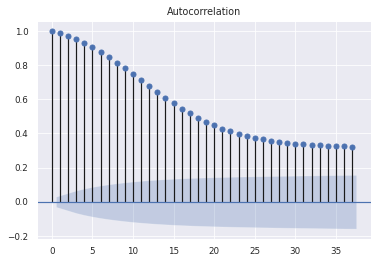

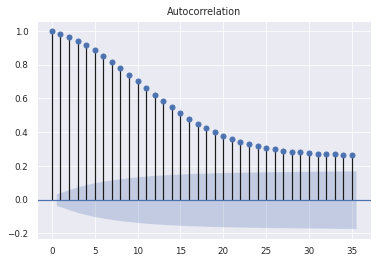

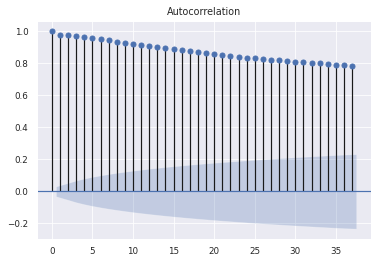

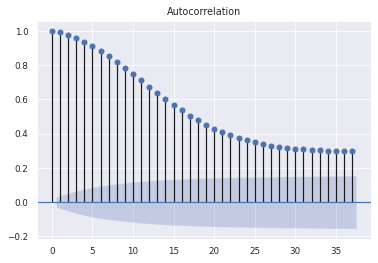

In [ ]:
for sensor_df in merged_groups.values():
  plot_acf(sensor_df['TEMP'])

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (T

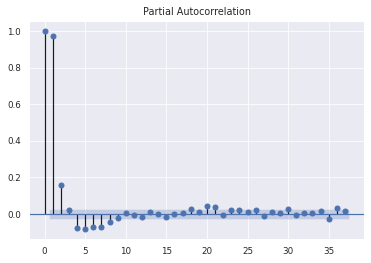

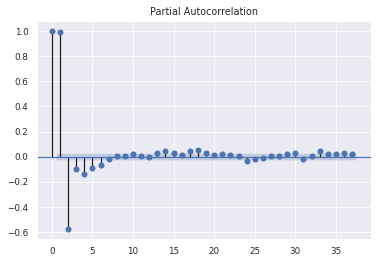

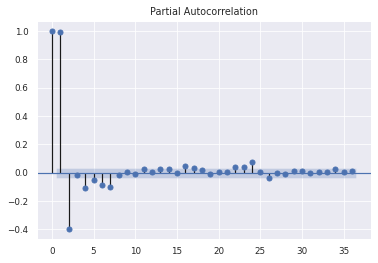

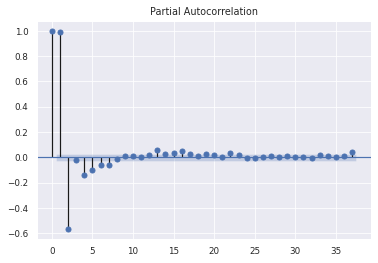

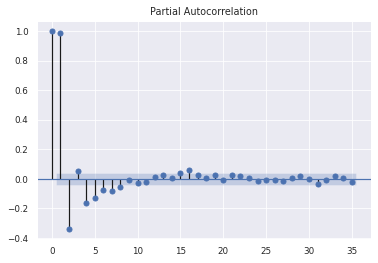

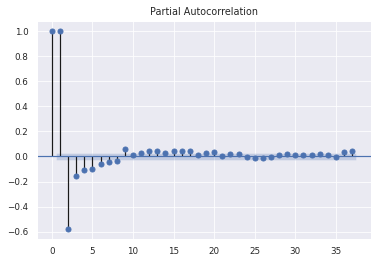

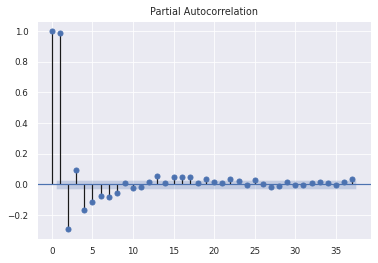

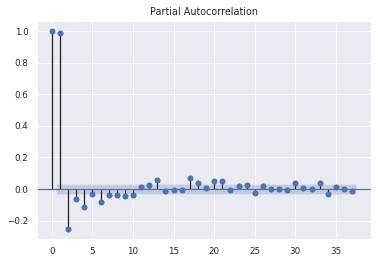

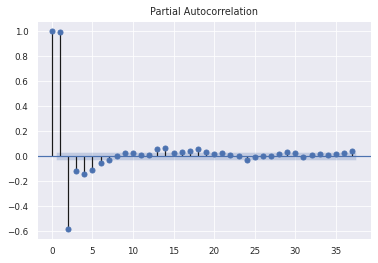

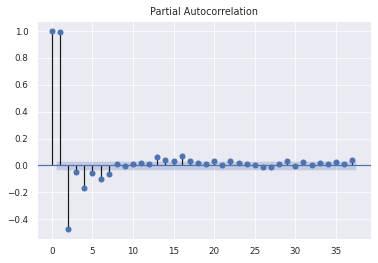

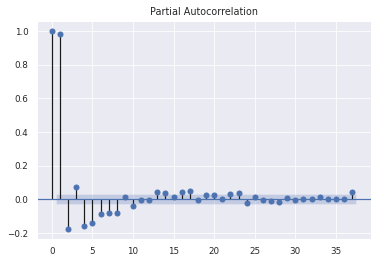

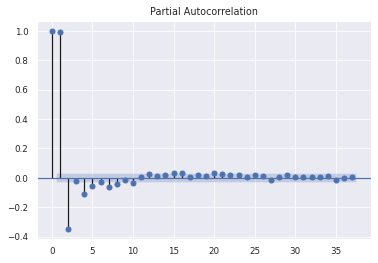

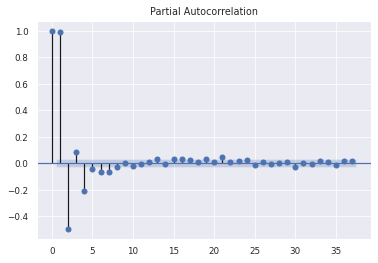

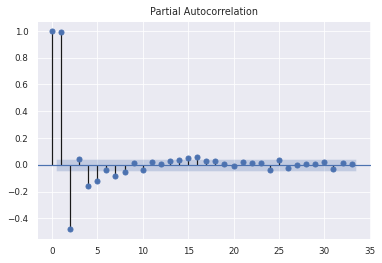

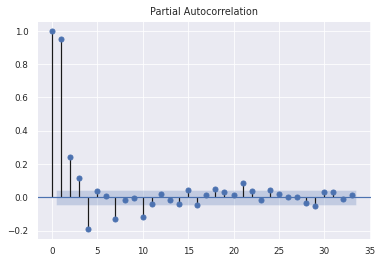

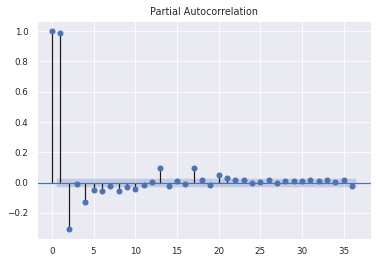

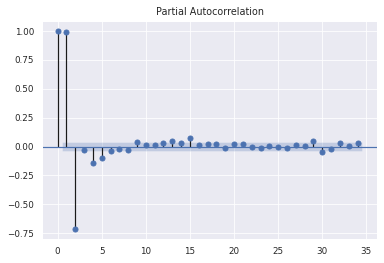

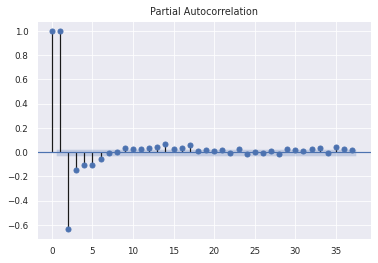

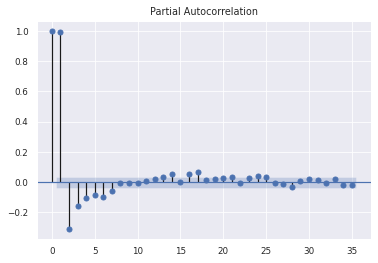

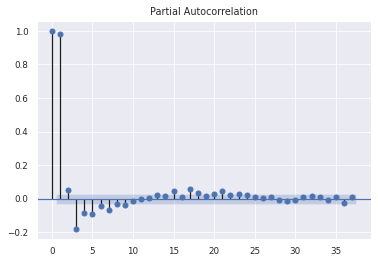

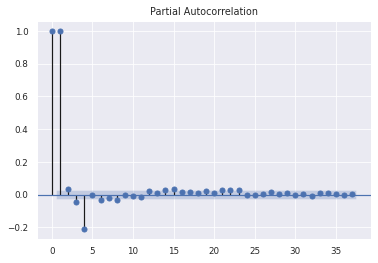

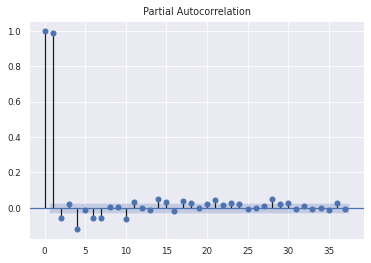

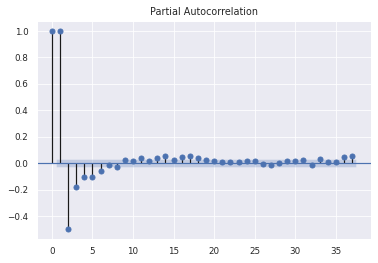

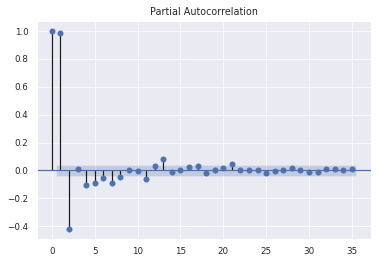

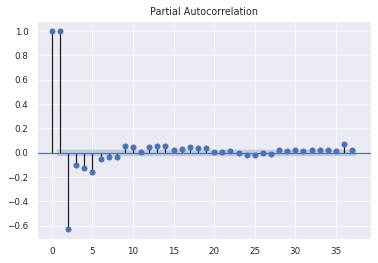

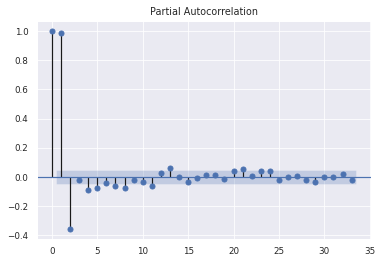

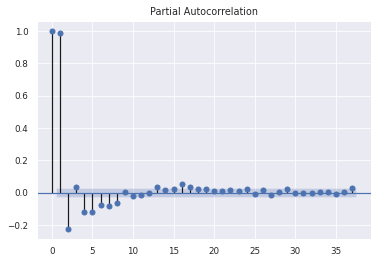

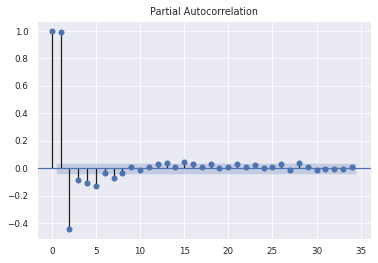

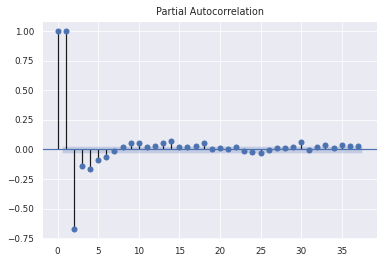

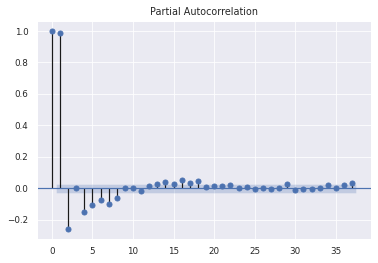

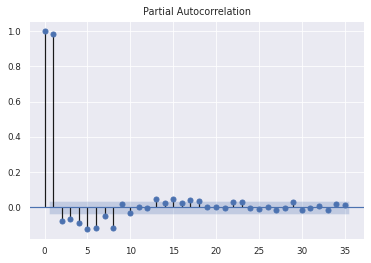

In [ ]:
for sensor_df in merged_groups.values():
  plot_pacf(sensor_df['TEMP'])

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (T

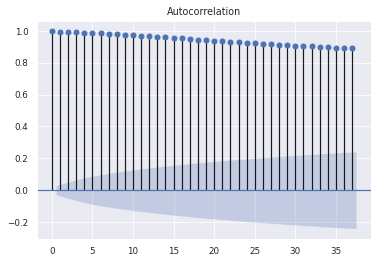

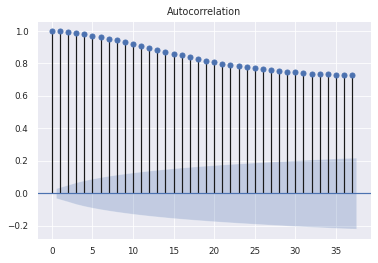

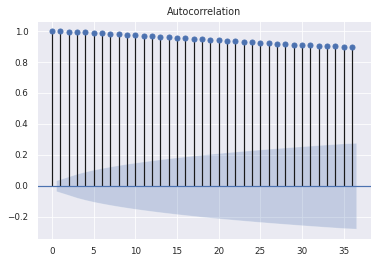

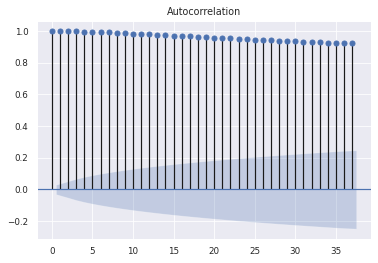

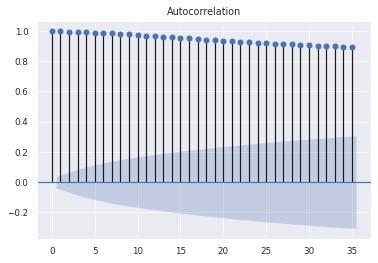

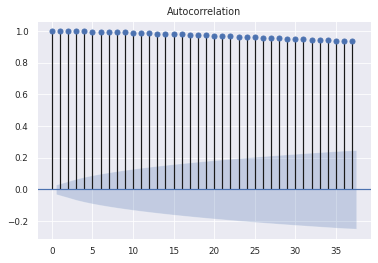

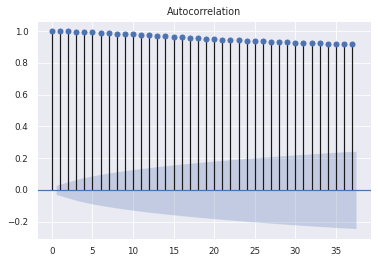

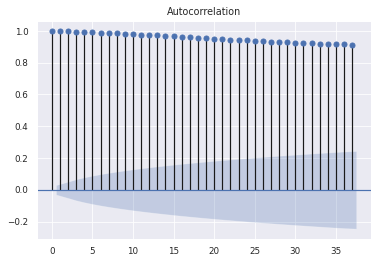

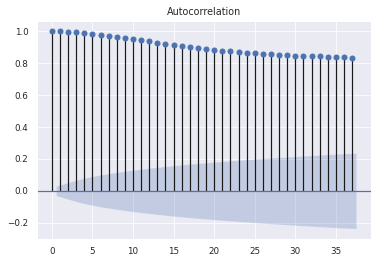

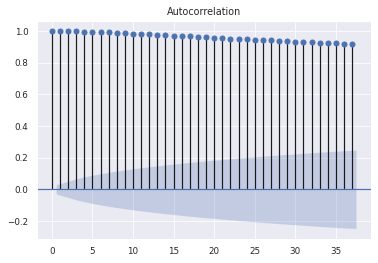

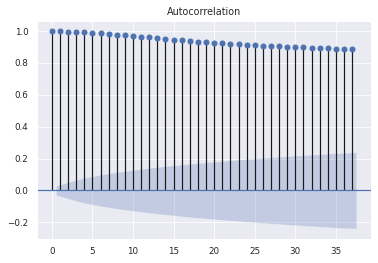

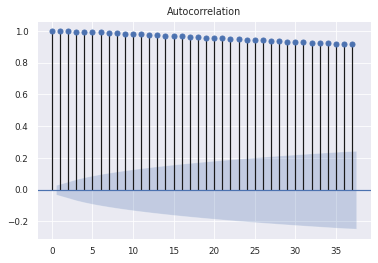

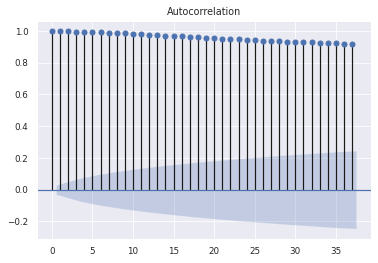

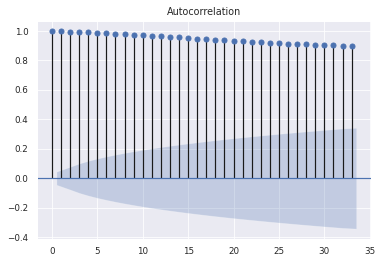

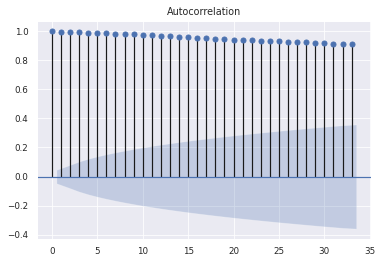

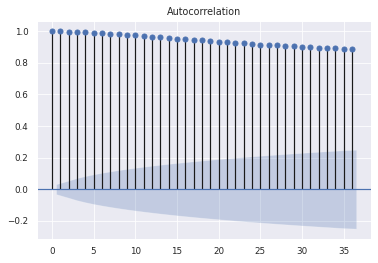

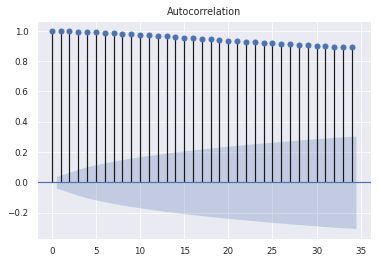

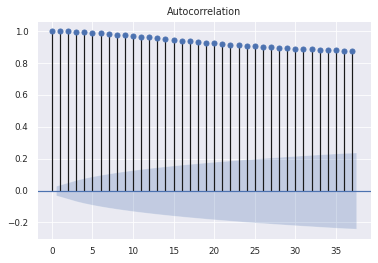

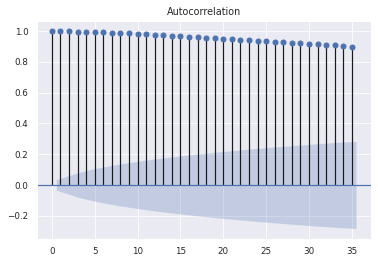

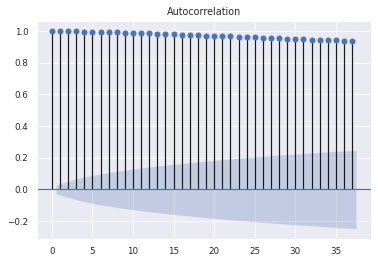

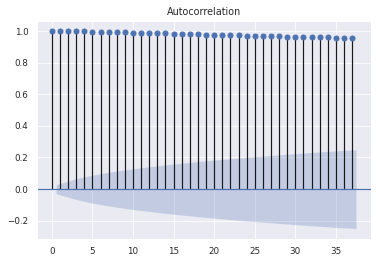

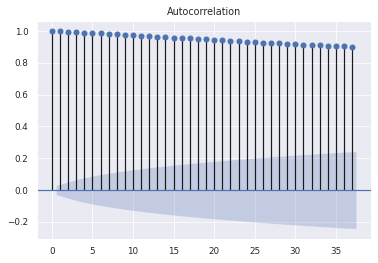

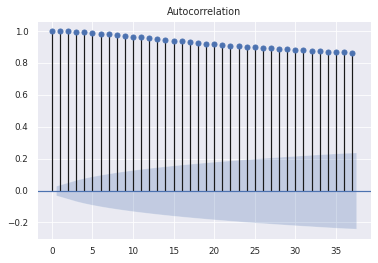

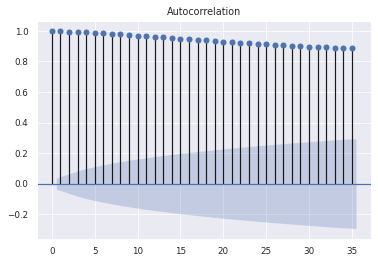

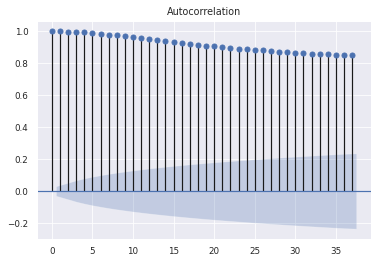

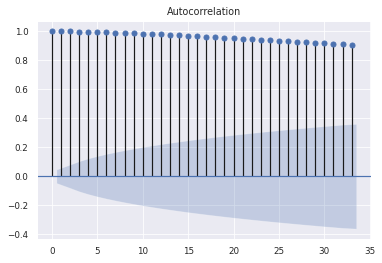

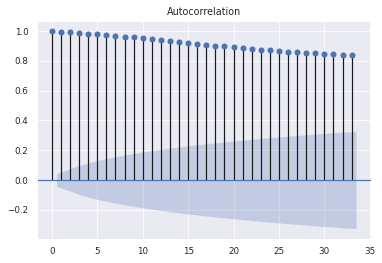

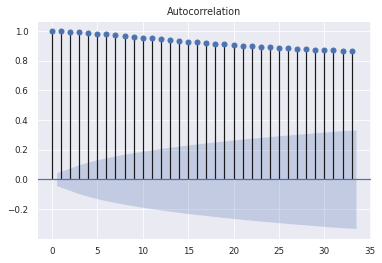

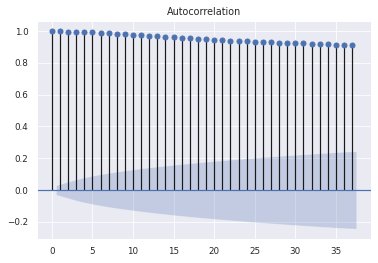

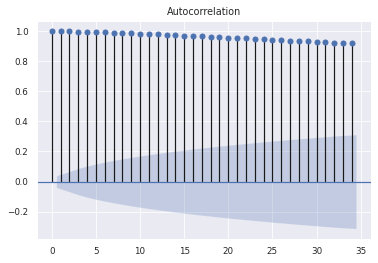

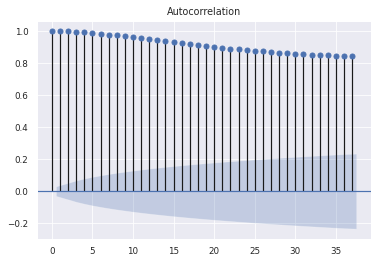

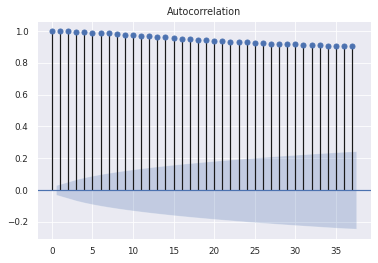

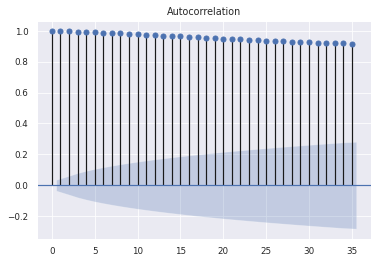

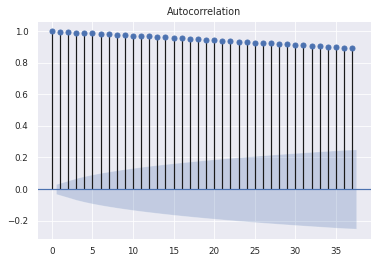

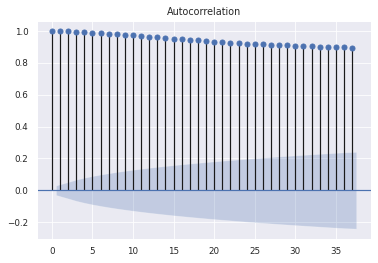

In [ ]:
for sensor_df in merged_groups.values():
  plot_acf(sensor_df['HUM'])

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/utils.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (T

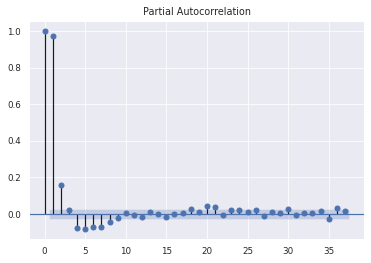

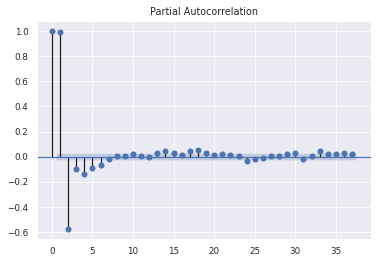

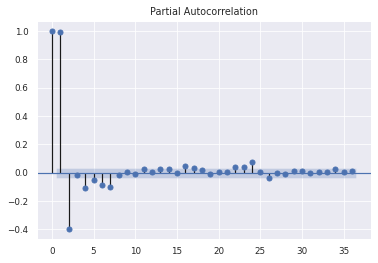

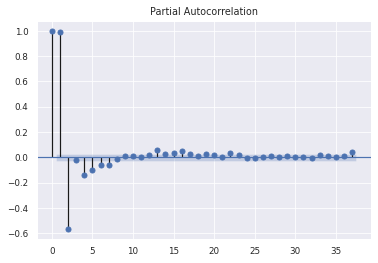

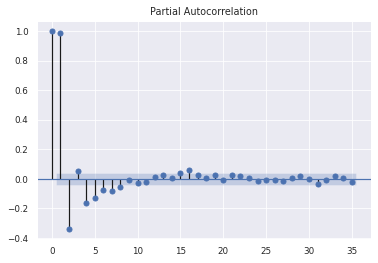

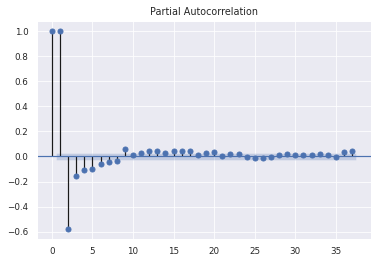

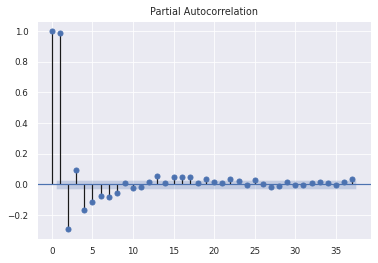

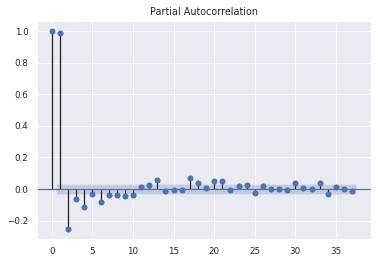

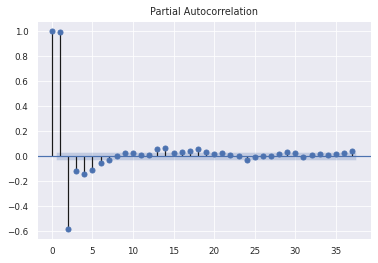

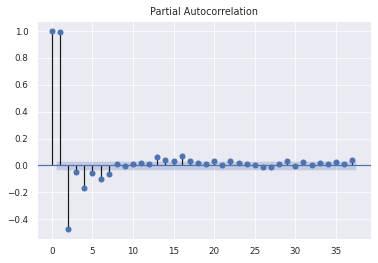

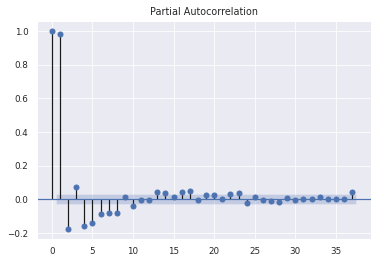

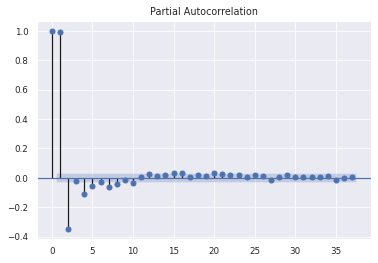

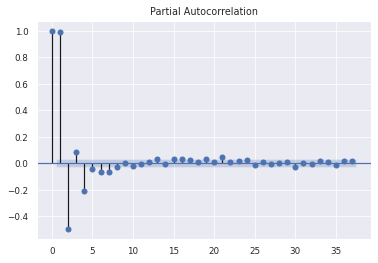

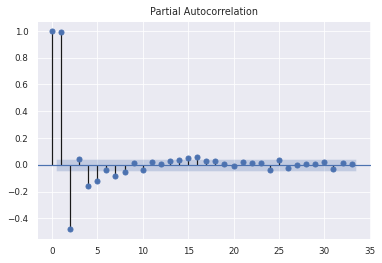

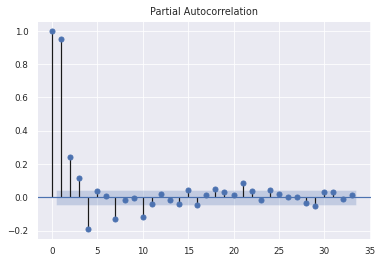

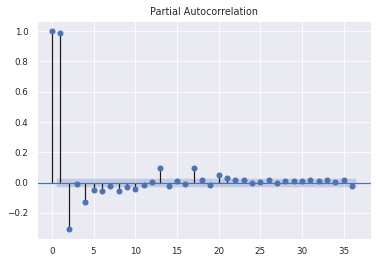

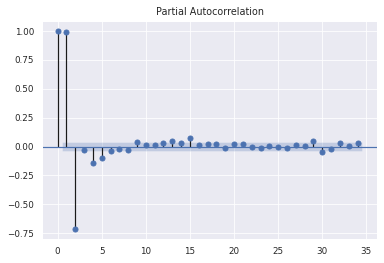

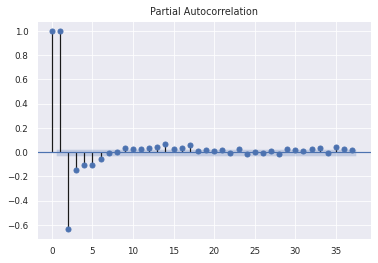

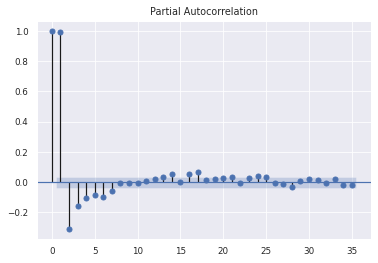

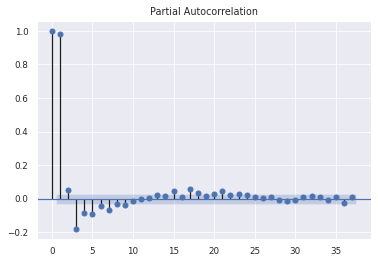

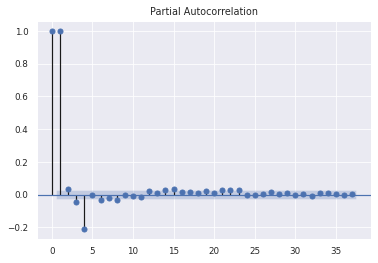

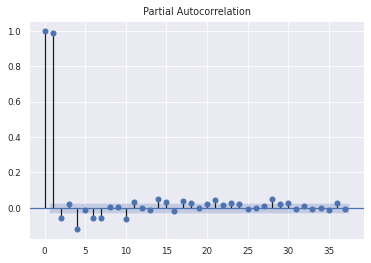

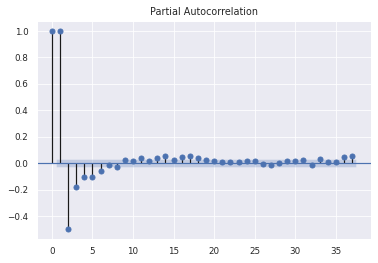

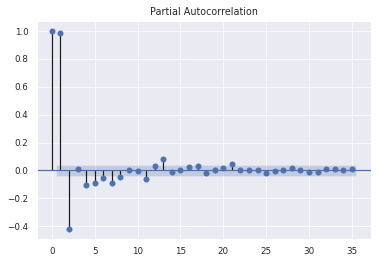

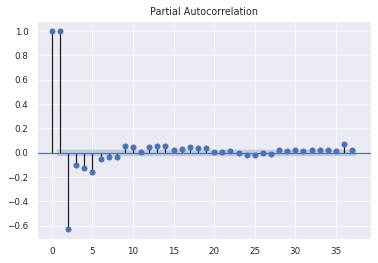

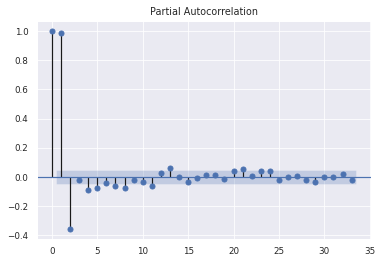

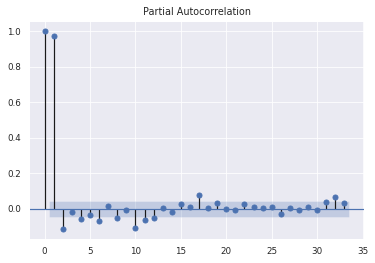

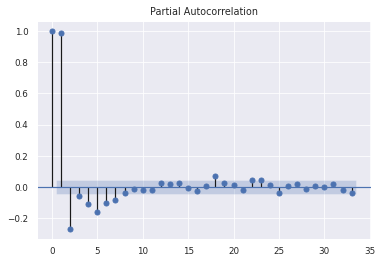

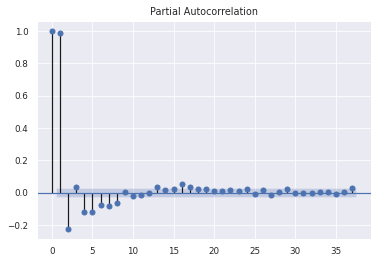

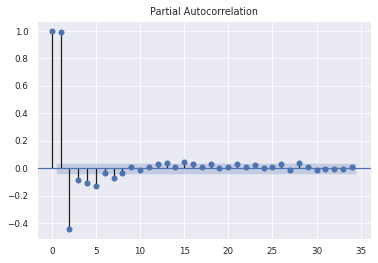

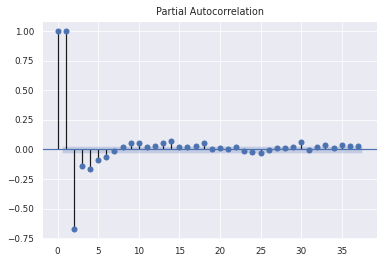

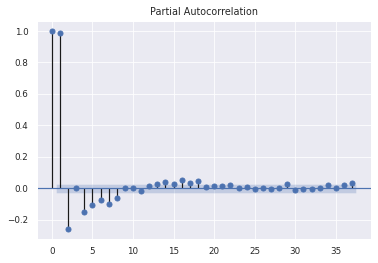

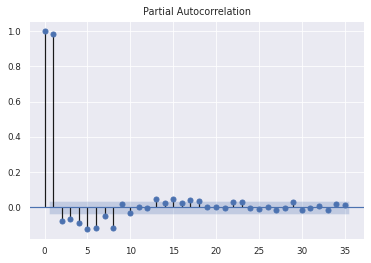

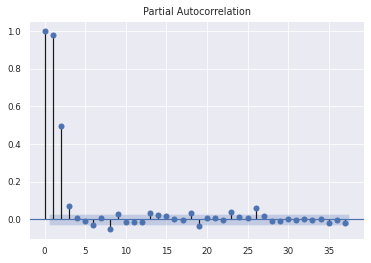

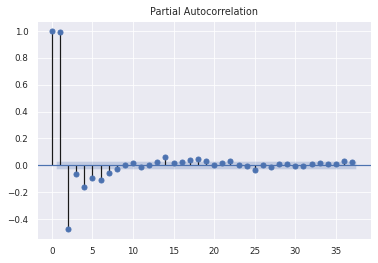

In [ ]:
for sensor_df in merged_groups.values():
  plot_pacf(sensor_df['TEMP'])

### Scale [-1, 1]

In [ ]:
# scale range
a = -1
b = 1

# Which are the MAX and MIN of each column??
Max_temp = -9999
Max_humid = -9999

min_temp = 9999
min_humid = 9999

for sensor_df in merged_groups.values():
    sensor_np = sensor_df.drop(columns='ADDR').to_numpy()
    for j in range(len(sensor_np)):
      if sensor_np[j,0] > Max_temp:
          Max_temp = sensor_np[j,0]
      if sensor_np[j,0] < min_temp:
          min_temp = sensor_np[j,0]
          
      if sensor_np[j,1] > Max_humid:
          Max_humid = sensor_np[j,1]
      if sensor_np[j,1] < min_humid:
          min_humid = sensor_np[j,1]

print(f'Max Temp: {Max_temp}')
print(f'min Temp: {min_temp}')
print(' ')

print(f'Max Humid: {Max_humid}')
print(f'min Humid: {min_humid}')
print(' ')

# Scaling between -1 and 1
diff_temp = Max_temp - min_temp
diff_humid = Max_humid - min_humid

scaled_groups = {} 

for i,sensor_df in enumerate(merged_groups.values()):
  sensor_np = sensor_df.drop(columns='ADDR').to_numpy()
  sensor_sc = np.empty(sensor_np.shape)
  for j in range(len(sensor_np)):
    sensor_sc[j,0] = ((b-a)*(sensor_np[j,0] - min_temp) /(diff_temp) ) + a
    sensor_sc[j,1] = ((b-a)*(sensor_np[j,1] - min_humid)/(diff_humid)) + a
  scaled_groups[i] = sensor_sc

print(f'Len of dict of scaled groups: {len(scaled_groups)}')

Max Temp: 46.94
min Temp: 8.14
 
Max Humid: 23.03
min Humid: 3.0
 
Len of dict of scaled groups: 35


### Prepare data to supervised problem

In [ ]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return X, y

In [ ]:
n_steps_in = 24
n_steps_out = 1

X = []
y = []
label_sensor = []
for i, sensor_np in enumerate(scaled_groups.values()):
    sensor_X, sensor_y = split_sequences(sensor_np, n_steps_in, n_steps_out)
    for j in range(len(sensor_X)):
      label_sensor.append(i)
    X.extend(sensor_X)
    y.extend(sensor_y)
    
X_sc = np.array(X)
y_sc = np.array(y)
label_sc = np.array(label_sensor)
print(X_sc.shape)
print(y_sc.shape)
print(label_sc.shape)

(125763, 24, 2)
(125763, 1, 2)
(125763,)


In [ ]:
# Number of classes
n_classes = len(np.unique(label_sc))
n_classes

35

In [ ]:
print(f'Sensor #{label_sc[0]}\n')
print(X_sc[0])
print('\n')
print(y_sc[0]) 

Sensor #0

[[ 0.51804124 -0.77234149]
 [ 0.49278351 -0.76734898]
 [ 0.48814433 -0.76635047]
 [ 0.51649485 -0.7763355 ]
 [ 0.49793814 -0.7783325 ]
 [ 0.48298969 -0.77034448]
 [ 0.48453608 -0.77234149]
 [ 0.49536082 -0.77533699]
 [ 0.46804124 -0.77034448]
 [ 0.45721649 -0.76834748]
 [ 0.43917526 -0.76635047]
 [ 0.42628866 -0.76435347]
 [ 0.4128866  -0.75736395]
 [ 0.43298969 -0.76535197]
 [ 0.38814433 -0.75336995]
 [ 0.38556701 -0.75636545]
 [ 0.42989691 -0.77034448]
 [ 0.41804124 -0.76934598]
 [ 0.41546392 -0.77034448]
 [ 0.4        -0.76635047]
 [ 0.38453608 -0.76235647]
 [ 0.41804124 -0.77333999]
 [ 0.39020619 -0.76635047]
 [ 0.39536082 -0.77034448]]


[[ 0.41907216 -0.777334  ]]


Sensor #18


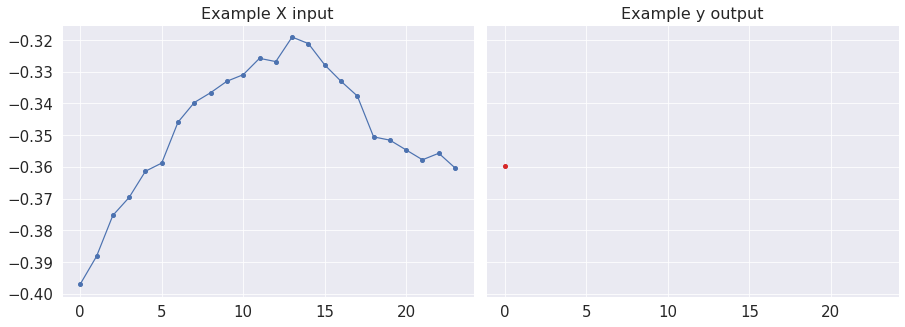

In [ ]:
fig,axs = plt.subplots(1,2,sharey=True,sharex=True,figsize=(15,5),
                       gridspec_kw={'wspace': 0.03})
axs[0].plot(X_sc[66666,:,0], marker='.', ms=8)
axs[0].set_title('Example X input', fontsize=16)
axs[1].plot(y_sc[66666,:,0], 'tab:red', marker='.', ms=8)
axs[1].set_title('Example y output', fontsize=16)
print(f'Sensor #{label_sc[66666]}')

### Split Train - Test

In [ ]:
list_ix_ = list(range(0,X_sc.shape[0]))
print(len(list_ix_))

125763


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [ ]:
random_seed = 73

list_ix = shuffle(list_ix_, random_state=random_seed)

max_val_ix = 9999999
max_test_ix = 9999999
security_margin = len(list_ix) - (n_steps_in) 

while (max_val_ix > security_margin or max_test_ix > security_margin):
  train_ix, val_test_ix = train_test_split(list_ix, test_size=0.25, train_size=0.75, random_state=random_seed)
  val_ix, test_ix = train_test_split(val_test_ix, test_size=0.60, train_size=0.40, random_state=random_seed)
  max_val_ix = np.amax(val_ix)
  max_test_ix = np.amax(test_ix)
  random_seed += 73

print(f'len(train_ix): {len(train_ix)}')
print(f'len(val_ix): {len(val_ix)}')
print(f'len(test_ix): {len(test_ix)}')

len(train_ix): 94322
len(val_ix): 12576
len(test_ix): 18865


In [ ]:
X_train = X_sc[train_ix]
X_val = X_sc[val_ix]
X_test = X_sc[test_ix]

y_train = y_sc[train_ix]
y_val = y_sc[val_ix]
y_test = y_sc[test_ix]

label_train = label_sc[train_ix].astype('float32')
label_val = label_sc[val_ix].astype('float32')
label_test = label_sc[test_ix].astype('float32')

In [ ]:
print(f'X_train shape: {X_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'X_test shape: {X_test.shape}')
print('')
print(f'y_train shape: {y_train.shape}')
print(f'y_val shape: {y_val.shape}')
print(f'y_test shape: {y_test.shape}')
print('')
print(f'label_train shape: {label_train.shape}')
print(f'label_val shape: {label_val.shape}')
print(f'label_test shape: {label_test.shape}')

X_train shape: (94322, 24, 2)
X_val shape: (12576, 24, 2)
X_test shape: (18865, 24, 2)

y_train shape: (94322, 1, 2)
y_val shape: (12576, 1, 2)
y_test shape: (18865, 1, 2)

label_train shape: (94322,)
label_val shape: (12576,)
label_test shape: (18865,)


Sensor #22.0


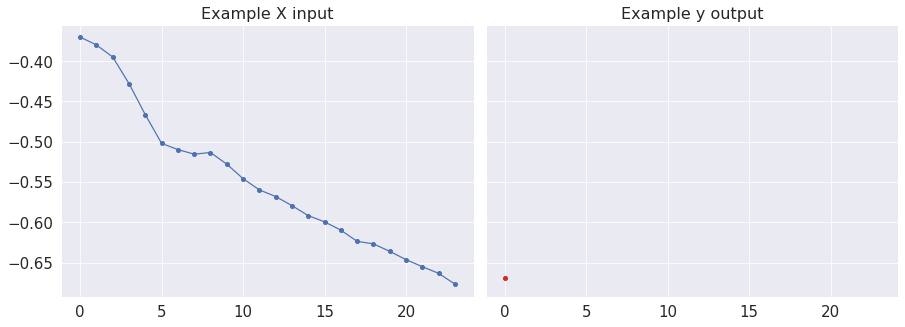

In [ ]:
fig,axs = plt.subplots(1,2,sharey=True,sharex=True,figsize=(15,5),
                       gridspec_kw={'wspace': 0.03})
axs[0].plot(X_val[600,:,0], marker='.', ms=8)
axs[0].set_title('Example X input', fontsize=16)
axs[1].plot(y_val[600,:,0], 'tab:red', marker='.', ms=8)
axs[1].set_title('Example y output', fontsize=16)
print(f'Sensor #{label_val[600]}')

In [ ]:
# constants/lists for later use
X_train_list = list(X_train)
X_train_len = len(X_train)
X_val_len = len(X_val)
X_test_len = len(X_test)
X_len = len(X_sc)

In [ ]:
X_val_range = np.arange(X_val_len)
print(X_val_range.shape)
print(X_val_range)

(12576,)
[    0     1     2 ... 12573 12574 12575]


In [ ]:
# get real values for comparison - validation set
n_prediction = 24
y_val_real_long = np.empty([X_val_len, n_prediction, 2])
for k, index in enumerate(val_ix):
    index_plus = index + n_prediction
    y_val_real_ = y_sc[index:index_plus, :, :]
    y_val_real = y_val_real_.reshape(1, n_prediction, 2)
    y_val_real_long[k,:,:] = y_val_real
print(f'y_val_real_long shape {y_val_real_long.shape}')

y_val_real_long shape (12576, 24, 2)


Sensor #10.0


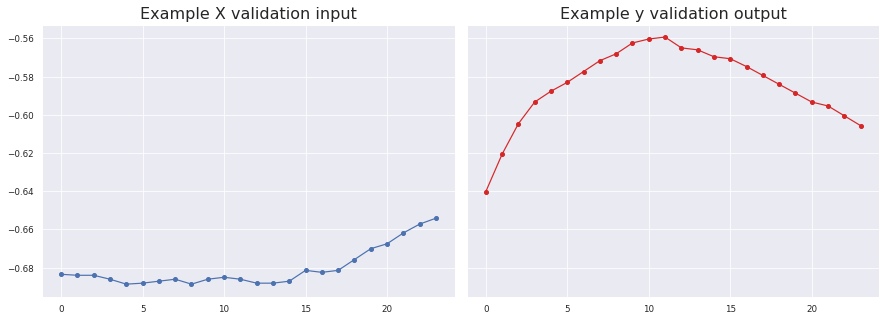

In [ ]:
sns.set_theme()
sns.set_context("paper")
fig,axs = plt.subplots(1,2,sharey=True,sharex=True,figsize=(15,5),
                       gridspec_kw={'wspace': 0.03})
axs[0].plot(X_val[669,:,0], marker='.', ms=8)
axs[0].set_title('Example X validation input', fontsize=16)
axs[1].plot(y_val_real_long[669,:,0], 'tab:red', marker='.', ms=8)
axs[1].set_title('Example y validation output', fontsize=16)
print(f'Sensor #{label_val[666]}')

In [ ]:
# get real values for comparison - validation set
n_prediction = 24
y_test_real_long = np.empty([X_test_len, n_prediction, 2])
for k, index in enumerate(test_ix):
    index_plus = index + n_prediction
    y_test_real_ = y_sc[index:index_plus, :, :]
    y_test_real = y_test_real_.reshape(1, n_prediction, 2)
    y_test_real_long[k,:,:] = y_test_real
print(f'y_test_real_long shape {y_test_real_long.shape}')

y_test_real_long shape (18865, 24, 2)


In [ ]:
# dimensions for X to feed the models
dim_out_step = y_train.shape[1]
dim_in_step = X_train.shape[1]
dim_in_plus_out = X_train.shape[1] + y_train.shape[1]
dim_n_vars = X_train.shape[2]
print(f'dim_out_step {dim_out_step}')
print(f'dim_in_step {dim_in_step}')
print(f'dim_in_plus_out {dim_in_plus_out}')
print(f'dim_n_vars {dim_n_vars}')

dim_out_step 1
dim_in_step 24
dim_in_plus_out 25
dim_n_vars 2


In [ ]:
dict_variables = {
    0: 'Temp',
    1: 'Humid'
}

## Wasserstein GAN Gradient Penalty model

In [ ]:
from tensorflow.keras import backend
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.layers import Dense, Conv1D, BatchNormalization, LSTM, LeakyReLU
from tensorflow.keras.layers import Flatten, Input, Dropout, concatenate, Embedding, Reshape
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.constraints import Constraint
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow import concat
from tensorflow.keras.utils import plot_model
import tensorflow_addons as tfa
import tensorflow as tf

from astropy import stats

from math import log2, log, isclose

from scipy.special import kl_div, rel_entr
from scipy.spatial.distance import jensenshannon

from sklearn.metrics import r2_score, max_error, mean_absolute_error, mean_squared_error

In [ ]:
# define the standalone critic model
def define_critic(in_shape=(25, 2), n_classes=35):
	# weight initialization
	init = RandomNormal(stddev=0.02)
 	# define model
	# input time series
	input_layer = Input(shape=in_shape, name='Time-Series_Input')
	#real_next_ = input_layer[:,-1,:] 
	#real_next_layer = Dense(2)(real_next_)
	# block 1
	x = tfa.layers.SpectralNormalization(Conv1D(64, kernel_size=4, strides=1, padding='same', 
      				kernel_initializer=init))(input_layer)
	x = LeakyReLU(alpha=0.2)(x)
	# block 2
	x = tfa.layers.SpectralNormalization(Conv1D(128, kernel_size=4, strides=1, padding='same', 
                  kernel_initializer=init))(x)
	x = LeakyReLU(alpha=0.2)(x)
	x = Dropout(0.2)(x)
  # block 3
	x = tfa.layers.SpectralNormalization(Conv1D(192, kernel_size=4, strides=1, padding='same', 
                  kernel_initializer=init))(x)
	x = LeakyReLU(alpha=0.2)(x)
	x = Dropout(0.2)(x)
  # block 4
	x = tfa.layers.SpectralNormalization(Conv1D(384, kernel_size=4, strides=1, padding='same', 
                  kernel_initializer=init))(x)
	x = LeakyReLU(alpha=0.2)(x)
	# Dense block
	x = Flatten()(x)
	x = Dense(32)(x)
	x = LeakyReLU(alpha=0.2)(x)
	x = Dropout(0.15)(x)
  # label input
	in_label = Input(shape=(1,), name='Categorical_Input')
	emb_layer = Embedding(n_classes, 8)(in_label) 
	emb_layer = Dense(8)(emb_layer)
	emb_layer = Reshape((8,))(emb_layer)
  # output
	merge_out = concatenate([x, emb_layer])
	out_layer = Dense(16)(merge_out)
	out_layer = LeakyReLU(alpha=0.2)(out_layer)
	out_layer_ = Dense(1, activation='linear')(out_layer)
	model = Model([input_layer, in_label], out_layer_)
	print(model.summary())
	return model

# define the standalone generator model
def define_generator(latent_dim=8, in_shape=(24, 2), n_classes=35):
	# weight initialization
	init = RandomNormal(stddev=0.02)
 	# define model
	# inputs
	in_condition = Input(shape=in_shape, name='Time-Series_Input')
	x = LSTM(160, kernel_initializer=init, return_sequences=True)(in_condition)
	x = BatchNormalization()(x)
	x = LSTM(64, kernel_initializer=init, return_sequences=False)(x)
	x = BatchNormalization()(x)  
  # label input
	in_label = Input(shape=(1,), name='Categorical_Input')
	emb_layer = Embedding(n_classes, 8)(in_label)
	emb_layer = Dense(8)(emb_layer)
	emb_layer = BatchNormalization()(emb_layer)
	emb_layer = Reshape((8,))(emb_layer)
	# noise block
	in_noise = Input(shape=(latent_dim,), name='Noise_Input')
	# merge and dense block
	merge = concatenate([x, emb_layer, in_noise])
	out_layer = Dense(32)(merge)
	out_layer = BatchNormalization()(out_layer)
	out_layer = LeakyReLU(alpha=0.2)(out_layer)
	out_layer_ = Dense(2, activation='linear')(out_layer)
	model = Model([in_condition, in_label, in_noise], out_layer_)
	print(model.summary())
	return model

class WGAN(tf.keras.Model):
    def __init__(
        self,
        discriminator,
        generator,
        latent_dim,
        discriminator_extra_steps=5,
        gp_weight=10.0,
    ):
        super(WGAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim
        self.d_steps = discriminator_extra_steps
        self.gp_weight = gp_weight

    def compile(self, d_optimizer, g_optimizer, d_loss_fn, g_loss_fn):
        super(WGAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.d_loss_fn = d_loss_fn
        self.g_loss_fn = g_loss_fn

    def gradient_penalty(self, batch_size, labels, real_images, fake_images):
        # both have shape [None, 1, 2]
        # get the interplated image
        alpha = tf.random.normal([batch_size, 1, 1], 0.0, 1.0)
        diff = fake_images - real_images
        interpolated = real_images + alpha * diff

        with tf.GradientTape() as gp_tape:
            gp_tape.watch(interpolated)
            # 1. Get the discriminator output for this interpolated image.
            pred = self.discriminator([interpolated, labels], training=True)
        # 2. Calculate the gradients w.r.t to this interpolated image.
        grads = gp_tape.gradient(pred, [interpolated])[0]
        # 3. Calcuate the norm of the gradients
        norm = tf.sqrt(tf.reduce_sum(tf.square(grads), axis=[1, 2]))
        gp = tf.reduce_mean((norm - 1.0) ** 2)
        return gp

    def train_step(self, real_images):
        # For each batch:
        # 1. Train the generator and get the generator loss
        # 2. Train the discriminator and get the discriminator loss
        # 3. Calculate the gradient penalty
        # 4. Multiply this gradient penalty with a constant weight factor
        # 5. Add gradient penalty to the discriminator loss
        # 6. Return generator and discriminator losses as a loss dictionary.
        input_data, labels = real_images
        real_next_ = input_data[:,-1,:] 
        real_next =  backend.expand_dims(real_next_,axis=1) #[None, 1, 2]
        X_cond = input_data[:,:-1,:] #[None, 24, 2]
        # Get the batch size
        batch_size = tf.shape(input_data)[0]
        # Train discriminator first. The original paper recommends training
        # the discriminator for `x` more steps (typically 5) as compared to
        # one step of the generator
        for i in range(self.d_steps):
            # Get the latent vector
            random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))
            with tf.GradientTape() as tape:
                # Generate fake images from the latent vector
                fake_images_ = self.generator([X_cond, labels, random_latent_vectors], training=True)
                fake_images_ = backend.expand_dims(fake_images_,axis=1)
                fake_images = concat([X_cond,fake_images_],axis=1)
                # Get the logits for the fake images
                fake_logits = self.discriminator([fake_images, labels], training=True)
                # Get the logits for real images
                real_logits =self.discriminator([input_data, labels], training=True)

                # Calculate discriminator loss using fake and real logits
                d_cost = self.d_loss_fn(real_img=real_logits, fake_img=fake_logits)
                # Calculate the gradient penalty
                gp = self.gradient_penalty(batch_size, labels, input_data, fake_images)
                # Add the gradient penalty to the original discriminator loss
                d_loss = d_cost + gp * self.gp_weight
            # Get the gradients w.r.t the discriminator loss
            d_gradient = tape.gradient(d_loss, self.discriminator.trainable_variables)
            # Update the weights of the discriminator using the discriminator optimizer
            self.d_optimizer.apply_gradients(
                zip(d_gradient, self.discriminator.trainable_variables)
            )
        # Train the generator now.
        # Get the latent vector
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))
        with tf.GradientTape() as tape:
            # Generate fake images using the generator
            gen_images_ = self.generator([X_cond, labels, random_latent_vectors], training=True)
            gen_images_ = backend.expand_dims(gen_images_,axis=1)
            generated_images = concat([X_cond,gen_images_],axis=1)
            # Get the discriminator logits for fake images
            gen_img_logits = self.discriminator([generated_images, labels], training=True)
            # Calculate the generator loss
            g_loss = self.g_loss_fn(gen_img_logits)
        # Get the gradients w.r.t the generator loss
        gen_gradient = tape.gradient(g_loss, self.generator.trainable_variables)
        # Update the weights of the generator using the generator optimizer
        self.g_optimizer.apply_gradients(
            zip(gen_gradient, self.generator.trainable_variables)
        )
        return {"d_loss": d_loss, "g_loss": g_loss}

class GANMonitor(tf.keras.callbacks.Callback):
    def __init__(self, num_test=2500, latent_dim=8, previous_KL=9999, previous_MSE=9999, previous_Pinball=9999):
        self.num_test = num_test
        self.latent_dim = latent_dim
        self.previous_KL = previous_KL
        self.previous_MSE = previous_MSE
        self.previous_Pinball = previous_Pinball
        self.d_hist = list()
        self.g_hist = list()

    def on_train_batch_end(self, batch, logs=None):
      # append losses for visualization later
      self.d_hist.append(logs.get('d_loss'))
      self.g_hist.append(logs.get('g_loss'))

    def on_epoch_end(self, epoch, logs=None):
      previous_KL = self.previous_KL
      previous_MSE = self.previous_MSE
      previous_Pinball = self.previous_Pinball
      step = epoch
      c_model = self.model.discriminator
      g_model = self.model.generator
      latent_dim = self.latent_dim
      n_prediction = 24
      n_plots = 4
      n_samples = X_val_len

      # Get predictions
      X_aux_2 = np.copy(X_val)
      for p in range(n_prediction):
      	noise_input = tf.random.normal(shape=(n_samples, latent_dim))
      	y_gen_ = g_model.predict([X_aux_2, label_val, noise_input]) #Step 1: Predict [val_len,2]
      	y_gen = y_gen_[:,np.newaxis,:] #[val_len,1,2]
      	if p == 0: #Step 2: Save prediction
      	  y_gen_final = y_gen.copy() 
      	else:
      	  y_gen_final = np.concatenate((y_gen_final, y_gen), axis=1)
      	X_aux = X_aux_2[:,1:,:] #Step 3: Put prediction in Condition Time-series
      	X_aux_2 = np.concatenate((X_aux,y_gen), axis=1) 
      
      # invert scale
      y_real_inv = np.empty(y_val_real_long.shape)
      y_gen_inv = np.empty(y_gen_final.shape)
      X_cond_inv = np.empty(X_val.shape)
      for s in range(n_samples):
      	for r in range(n_prediction):
      		y_real_inv[s,r,0] = (y_val_real_long[s,r,0] - a)*(diff_temp/(b-a)) +(min_temp)
      		y_real_inv[s,r,1] = (y_val_real_long[s,r,1] - a)*(diff_humid/(b-a))+(min_humid)
      		y_gen_inv[s,r,0] = (y_gen_final[s,r,0] - a)*(diff_temp/(b-a)) +(min_temp)
      		y_gen_inv[s,r,1] = (y_gen_final[s,r,1] - a)*(diff_humid/(b-a))+(min_humid)
      	for t in range(n_prediction):
      		X_cond_inv[s,t,0] = (X_val[s,t,0] - a)*(diff_temp/(b-a)) +(min_temp)
      		X_cond_inv[s,t,1] = (X_val[s,t,1] - a)*(diff_humid/(b-a))+(min_humid)
        
      temp_real = y_real_inv[:,:,0]
      flat_temp_real = temp_real.flatten()
      temp_gen = y_gen_inv[:,:,0]
      flat_temp_gen = temp_gen.flatten()
      humid_real = y_real_inv[:,:,1]
      flat_humid_real = humid_real.flatten()
      humid_gen = y_gen_inv[:,:,1]
      flat_humid_gen = humid_gen.flatten()

      ### METRICS ###

			# KL divergence with 2D histogram
      H_compute_bins_temp = np.histogram(flat_temp_real, bins='auto')
      H_compute_bins_humid = np.histogram(flat_humid_real, bins='auto')
      n_bins_temp = H_compute_bins_humid[0].shape[0]
      n_bins_humid = H_compute_bins_humid[0].shape[0]
      # If we add more than 2 variables we will need to use np.histogramdd
      H_real, xedges_real, yedges_real = np.histogram2d(flat_temp_real, flat_humid_real, bins=[n_bins_temp,n_bins_humid])
      H_real = (np.where(H_real==0, 1e-6, H_real).flatten())/len(flat_temp_real)
      H_gen, xedges_gen, yedges_gen = np.histogram2d(flat_temp_gen, flat_humid_gen, bins=[n_bins_temp,n_bins_humid])
      H_gen = (np.where(H_gen==0, 1e-6, H_gen).flatten())/len(flat_temp_gen)
      assert isclose(sum(H_real),1.,rel_tol=1e-5)
      assert isclose(sum(H_gen), 1.,rel_tol=1e-5)
      KL_diverg = kl_divergence(H_gen,H_real)

      # Pinball Loss Function
      pinball_temp = list()
      pinball_humid = list()
      tau = [0.1, 0.3, 0.5, 0.7, 0.9]
      for t in tau:
        pinball_temp.append(pinball_func(flat_temp_real, flat_temp_gen, tau=t))
        pinball_humid.append(pinball_func(flat_humid_real, flat_humid_gen, tau=t))

      pinball_mean_temp = sum(pinball_temp)/(len(pinball_temp))
      pinball_mean_humid = sum(pinball_humid)/(len(pinball_humid))
      Pinball_mean = (pinball_mean_temp + pinball_mean_humid)/2

			#MSE
      MSE_temp = mean_absolute_error(flat_temp_real, flat_temp_gen)
      MSE_humid = mean_absolute_error(flat_humid_real, flat_humid_gen)
      MSE_mean = (MSE_temp + MSE_humid)/2

      # random samples fron validation set to plot
      ix_plot = np.random.choice(X_val_range, n_plots, replace=False)

      # save models
      tail_name_kl = ''
      tail_name_pinball = ''
      tail_name_mse = ''
      save_models = False
      print('')
      if (KL_diverg < previous_KL):
      	self.previous_KL = KL_diverg
      	save_models = True
      	tail_name_kl = '_KL'
      	print('Better KL')
      if (Pinball_mean < previous_Pinball):
      	self.previous_Pinball = Pinball_mean
      	save_models = True
      	tail_name_pinball = '_Pinball'
      	print('Better Pinball')
      if (MSE_mean < previous_MSE):
      	self.previous_MSE = MSE_mean
      	save_models = True
      	tail_name_mse = '_MSE'
      	print('Better MSE')
      # EAAI
      if step%50==0:
      	save_models = True
      	tail_name_mse = '_50s'
      	print('Save each 50 steps')
      # EAAI
      if save_models == True:
        filename_critic = '/content/drive/My Drive/TFM/Experiments/'+folder_name+'/'+'c_model_'+str(step+1)+tail_name_kl+tail_name_pinball+tail_name_mse
        c_model.save_weights(filename_critic)
        filename_generator = '/content/drive/My Drive/TFM/Experiments/'+folder_name+'/'+'gen_model_'+str(step+1)+tail_name_kl+tail_name_pinball+tail_name_mse
        g_model.save_weights(filename_generator)
        print(f'>{step+1} MODELS HAVE BEEN SAVED')
        # save data
        filename = '/content/drive/My Drive/TFM/Experiments/'+folder_name+'/'+str(step+1)+'_temp_real.npy'
        np.save(filename, temp_real)
        filename = '/content/drive/My Drive/TFM/Experiments/'+folder_name+'/'+str(step+1)+'_temp_gen.npy'
        np.save(filename, temp_gen)
        filename = '/content/drive/My Drive/TFM/Experiments/'+folder_name+'/'+str(step+1)+'_humid_real.npy'
        np.save(filename, humid_real)
        filename = '/content/drive/My Drive/TFM/Experiments/'+folder_name+'/'+str(step+1)+'_humid_gen.npy'
        np.save(filename, humid_gen)
        # plot images and metrics
        for num, i in enumerate(ix_plot):
          for j in range(dim_n_vars):
            fig,axs = plt.subplots(1,dim_n_vars,sharey=True,sharex=True,figsize=(15,5),gridspec_kw={'wspace': 0.03})
            axs[0].plot(X_cond_inv[i,:,j], marker='.', ms=8)
            name = dict_variables[j] + ' - Input'
            axs[0].set_title(name, fontsize=16)
            axs[1].plot(y_real_inv[i,:,j], marker='.', ms=8)
            axs[1].plot(y_gen_inv[i,:,j], 'tab:red', marker='.', ms=8)
            axs[1].set_title('Output (red: predicted)', fontsize=16)
            filename_img = '/content/drive/My Drive/TFM/Experiments/'+folder_name+'/'+str(step+1)+'_'+str(i)+'_'+str(dict_variables[j])+'.png'
            plt.savefig(filename_img)
            plt.show()
            plt.close()
            print(f'Sensor #{label_val[i]}')
            print(dict_variables[j])
						# mean absolute error ± standard deviation
            error_np = np.subtract(y_real_inv[i,:,j], y_gen_inv[i,:,j])
            mae = mean_absolute_error(y_real_inv[i,:,j], y_gen_inv[i,:,j])
            std = np.std(error_np)
            print(f'MAE: {mae} ± {std}') 
            # mean squared error
            mse = mean_squared_error(y_real_inv[i,:,j], y_gen_inv[i,:,j])
            print(f'MSE: {mse}') 
						# root mean square error
            rmse = np.sqrt(mse)
            print(f'RMSE: {rmse}') 
						# max error
            max_err = max_error(y_real_inv[i,:,j], y_gen_inv[i,:,j])
            print(f'Max Error: {max_err}') 
      #Print global metrics
      print(f'\nKL Divergence: {KL_diverg} bits')
      print(f'Pinball Loss Temp mean: {pinball_mean_temp}')
      print(f'Pinball Loss Humid mean: {pinball_mean_humid}')
      print(f'MSE Temp: {MSE_temp}')
      print(f'MSE Humid: {MSE_humid}')
      # plot histograms
      fig,axs = plt.subplots(1,dim_n_vars,sharey=True,sharex=True,figsize=(12,4),gridspec_kw={'wspace': 0.03})
      #axs[0].hist(flat_temp_real, bins='auto')
      axs[0].set_title('Temp Real Distribution', fontsize=14)
      sns.histplot(flat_temp_real, bins=n_bins_temp, ax=axs[0])
      #axs[1].hist(flat_temp_gen, bins='auto')
      axs[1].set_title('Temp Generated Distribution', fontsize=14)
      sns.histplot(flat_temp_gen, bins=n_bins_temp, ax=axs[1])
      filename_img = '/content/drive/My Drive/TFM/Experiments/'+folder_name+'/'+str(step+1)+'_histogram_temp.png'
      plt.savefig(filename_img)
      plt.show()
      plt.close()
      fig,axs = plt.subplots(1,dim_n_vars,sharey=True,sharex=True,figsize=(12,4),gridspec_kw={'wspace': 0.03})
      #axs[0].hist(flat_humid_real, bins='auto')
      axs[0].set_title('Humid Real Distribution', fontsize=14)
      sns.histplot(flat_humid_real, bins=n_bins_humid, ax=axs[0])
      #axs[1].hist(flat_humid_gen, bins='auto')
      axs[1].set_title('Humid Generated Distribution', fontsize=14)
      sns.histplot(flat_humid_gen, bins=n_bins_humid, ax=axs[1])
      filename_img = '/content/drive/My Drive/TFM/Experiments/'+folder_name+'/'+str(step+1)+'_histogram_humid.png'
      plt.savefig(filename_img)
      plt.show()
      plt.close()
      # plot and save history
      plot_history(self.d_hist, self.g_hist, step)

# pinball loss function [https://www.tensorflow.org/addons/api_docs/python/tfa/losses/pinball_loss]
def pinball_func(y_true, y_pred, tau):
	values = list()
	for l in range(len(y_true)):
		values.append(max(tau*(y_true[l] - y_pred[l]), (tau - 1)*(y_true[l] - y_pred[l])))
	return (sum(values)/len(values))

# calculate the kl divergence in bits
def kl_divergence(p,q):
	return sum((p[i] * log2(p[i]/q[i]) for i in range(len(p))))

# calculate the kl divergence in nats
def kl_divergence_nats(p,q):
	return sum((p[i] * log(p[i]/q[i]) for i in range(len(p))))

# create a line plot of loss for the gan and save to file
def plot_history(d_hist, g_hist, step):
	# plot history
	filename = '/content/drive/My Drive/TFM/Experiments/'+folder_name+'/'+'final_d_hist.npy'
	np.save(filename, d_hist)
	filename = '/content/drive/My Drive/TFM/Experiments/'+folder_name+'/'+'final_g_hist.npy'
	np.save(filename, g_hist)
	plt.plot(d_hist, label='crit')
	plt.plot(g_hist, label='gen')
	plt.legend()
	#pyplot.savefig('plot_line_plot_loss.png')
	#pyplot.close()
	filename = '/content/drive/My Drive/TFM/Experiments/'+folder_name+'/'+str(step+1)+'_final_train_loss.png'
	plt.savefig(filename)
	plt.show()
	plt.close()
 
# Define the loss functions to be used for discrimiator
# This should be (fake_loss - real_loss)
# We will add the gradient penalty later to this loss function
def discriminator_loss(real_img, fake_img):
    real_loss = tf.reduce_mean(real_img)
    fake_loss = tf.reduce_mean(fake_img)
    return fake_loss - real_loss

# Define the loss functions to be used for generator
def generator_loss(fake_img):
    return -tf.reduce_mean(fake_img)

In [ ]:
# Adam optimizer
d_opt_Adam = Adam(learning_rate=0.0003, beta_1=0.5, beta_2=0.9)
g_opt_Adam = Adam(learning_rate=0.0001, beta_1=0.5, beta_2=0.9)

### Alternative Optimizers [AdaBelief, OMD]

In [ ]:
# AdaBelief optimizer
!pip install adabelief-tf==0.1.0

In [ ]:
from adabelief_tf import AdaBeliefOptimizer
d_opt_AdaBelief = AdaBeliefOptimizer(learning_rate=1e-2, epsilon=1e-10, rectify=False, weight_decay=1.2e-6)
g_opt_AdaBelief = AdaBeliefOptimizer(learning_rate=3.3e-3, epsilon=1e-10, rectify=False, weight_decay=1.2e-6)
#g_opt_AdaBelief = AdaBeliefOptimizer(learning_rate=2e-4, epsilon=1e-10, rectify=False)

Please check your arguments if you have upgraded adabelief-tf from version 0.0.1.
Modifications to default arguments:
                           eps  weight_decouple    rectify
-----------------------  -----  -----------------  -------------
adabelief-tf=0.0.1       1e-08  Not supported      Not supported
Current version (0.1.0)  1e-14  supported          default: True
For a complete table of recommended hyperparameters, see
https://github.com/juntang-zhuang/Adabelief-Optimizer

Please check your arguments if you have upgraded adabelief-tf from version 0.0.1.
Modifications to default arguments:
                           eps  weight_decouple    rectify
-----------------------  -----  -----------------  -------------
adabelief-tf=0.0.1       1e-08  Not supported      Not supported
Current version (0.1.0)  1e-14  supported          default: True
For a complete table of recommended hyperparameters, see
https://github.com/juntang-zhuang/Adabelief-Optimizer



In [ ]:
# Optimistic Mirror Descent for the Adam optimizer
from tensorflow.keras.optimizers import Optimizer
class optimAdam(Optimizer):
    def __init__(self, lr=0.001, beta_1=0.9, beta_2=0.999,
                 epsilon=1e-8, decay=0., **kwargs):
        super(optimAdam, self).__init__(**kwargs)
        with backend.name_scope(self.__class__.__name__):
            self.iterations = backend.variable(0, dtype='int64', name='iterations')
            self.lr = backend.variable(lr, name='lr')
            self.beta_1 = backend.variable(beta_1, name='beta_1')
            self.beta_2 = backend.variable(beta_2, name='beta_2')
            self.decay = backend.variable(decay, name='decay')
        self.epsilon = epsilon
        self.initial_decay = decay

    def get_updates(self, loss, params):
        grads = self.get_gradients(loss, params)
        self.updates = [backend.update_add(self.iterations, 1)]

        lr = self.lr
        if self.initial_decay > 0:
            lr *= (1. / (1. + self.decay * backend.cast(self.iterations,
                                                  backend.dtype(self.decay))))

        t = backend.cast(self.iterations, backend.floatx()) + 1
        lr_t = lr * (backend.sqrt(1. - backend.pow(self.beta_2, t)) /
                     (1. - backend.pow(self.beta_1, t)))

        ms = [backend.zeros(backend.int_shape(p), dtype=backend.dtype(p)) for p in params]
        vs = [backend.zeros(backend.int_shape(p), dtype=backend.dtype(p)) for p in params]
        self.weights = [self.iterations] + ms + vs
        ms_old = [backend.zeros(backend.int_shape(p), dtype=backend.dtype(p)) for p in params]
        vs_old = [backend.zeros(backend.int_shape(p), dtype=backend.dtype(p)) for p in params]

        for p, g, m, v, m_old, v_old in zip(params, grads, ms, vs, ms_old, vs_old):
            m_t = (self.beta_1 * m) + (1. - self.beta_1) * g
            v_t = (self.beta_2 * v) + (1. - self.beta_2) * backend.square(g)
            p_t = p - 2 * lr_t * m_t / (backend.sqrt(v_t) + self.epsilon) + lr_t * m_old / (backend.sqrt(v_old) + self.epsilon)

            self.updates.append(backend.update(m_old, m))
            self.updates.append(backend.update(v_old, v))
            self.updates.append(backend.update(m, m_t))
            self.updates.append(backend.update(v, v_t))
            new_p = p_t

            # Apply constraints.
            if getattr(p, 'constraint', None) is not None:
                new_p = p.constraint(new_p)

            self.updates.append(backend.update(p, new_p))
        return self.updates

    def get_config(self):
        config = {'lr': float(backend.get_value(self.lr)),
                  'beta_1': float(backend.get_value(self.beta_1)),
                  'beta_2': float(backend.get_value(self.beta_2)),
                  'decay': float(backend.get_value(self.decay)),
                  'epsilon': self.epsilon}
        base_config = super(optimAdam, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [ ]:
# Get the Optimistic Mirror Adam optimizer
d_opt_OptimisticAdam = optimAdam(lr=0.003, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=0., name='d_opt_OptimisticAdam')
g_opt_OptimisticAdam = optimAdam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=0., name='g_opt_OptimisticAdam')

### Plot models

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Time-Series_Input (InputLayer)  [(None, 25, 2)]     0           []                               
                                                                                                  
 spectral_normalization (Spectr  (None, 25, 64)      640         ['Time-Series_Input[0][0]']      
 alNormalization)                                                                                 
                                                                                                  
 leaky_re_lu (LeakyReLU)        (None, 25, 64)       0           ['spectral_normalization[0][0]'] 
                                                                                                  
 spectral_normalization_1 (Spec  (None, 25, 128)     33024       ['leaky_re_lu[0][0]']        

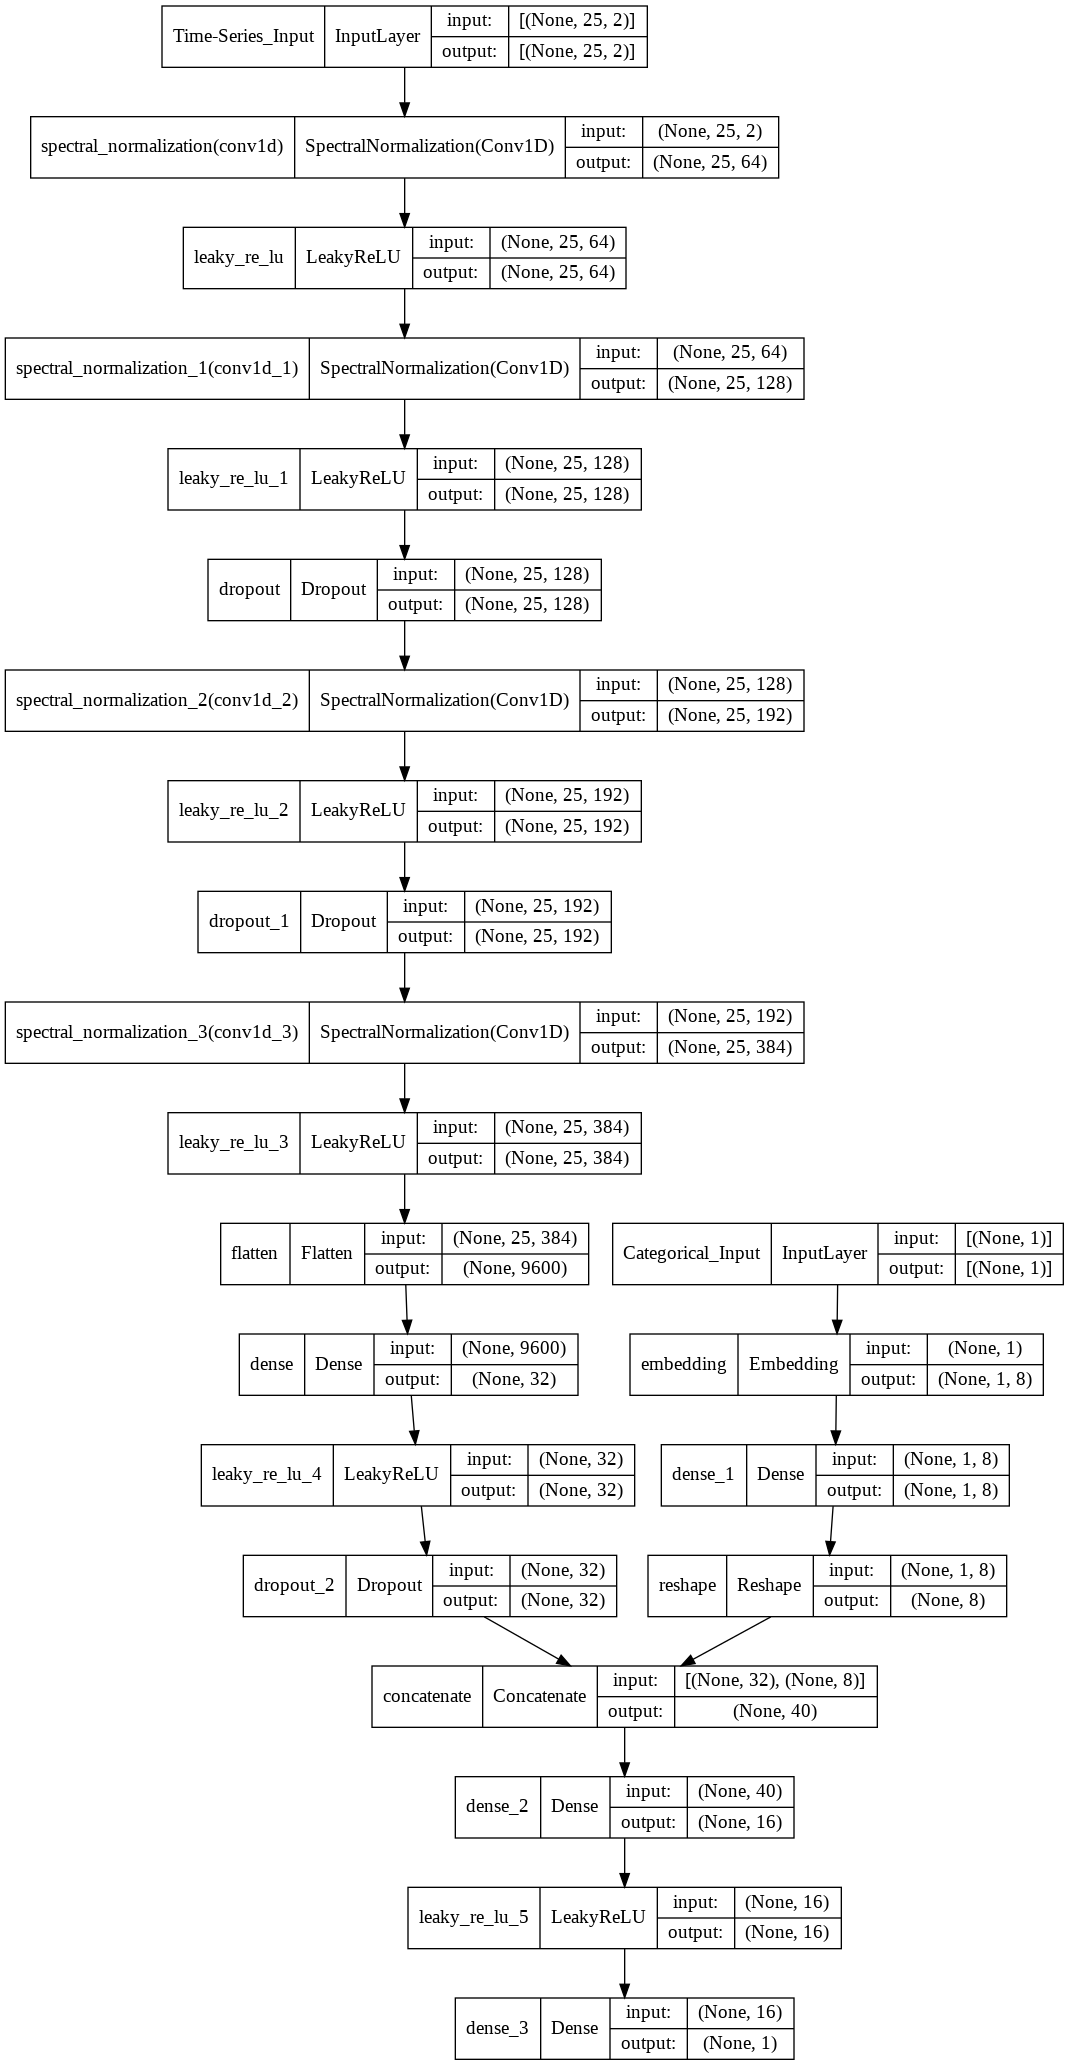

In [ ]:
d_model = define_critic(in_shape=(25, 2), n_classes=35)
plot_model(d_model, show_shapes=True)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Time-Series_Input (InputLayer)  [(None, 24, 2)]     0           []                               
                                                                                                  
 Categorical_Input (InputLayer)  [(None, 1)]         0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 24, 160)      104320      ['Time-Series_Input[0][0]']      
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 8)         280         ['Categorical_Input[0][0]']      
                                                                                            

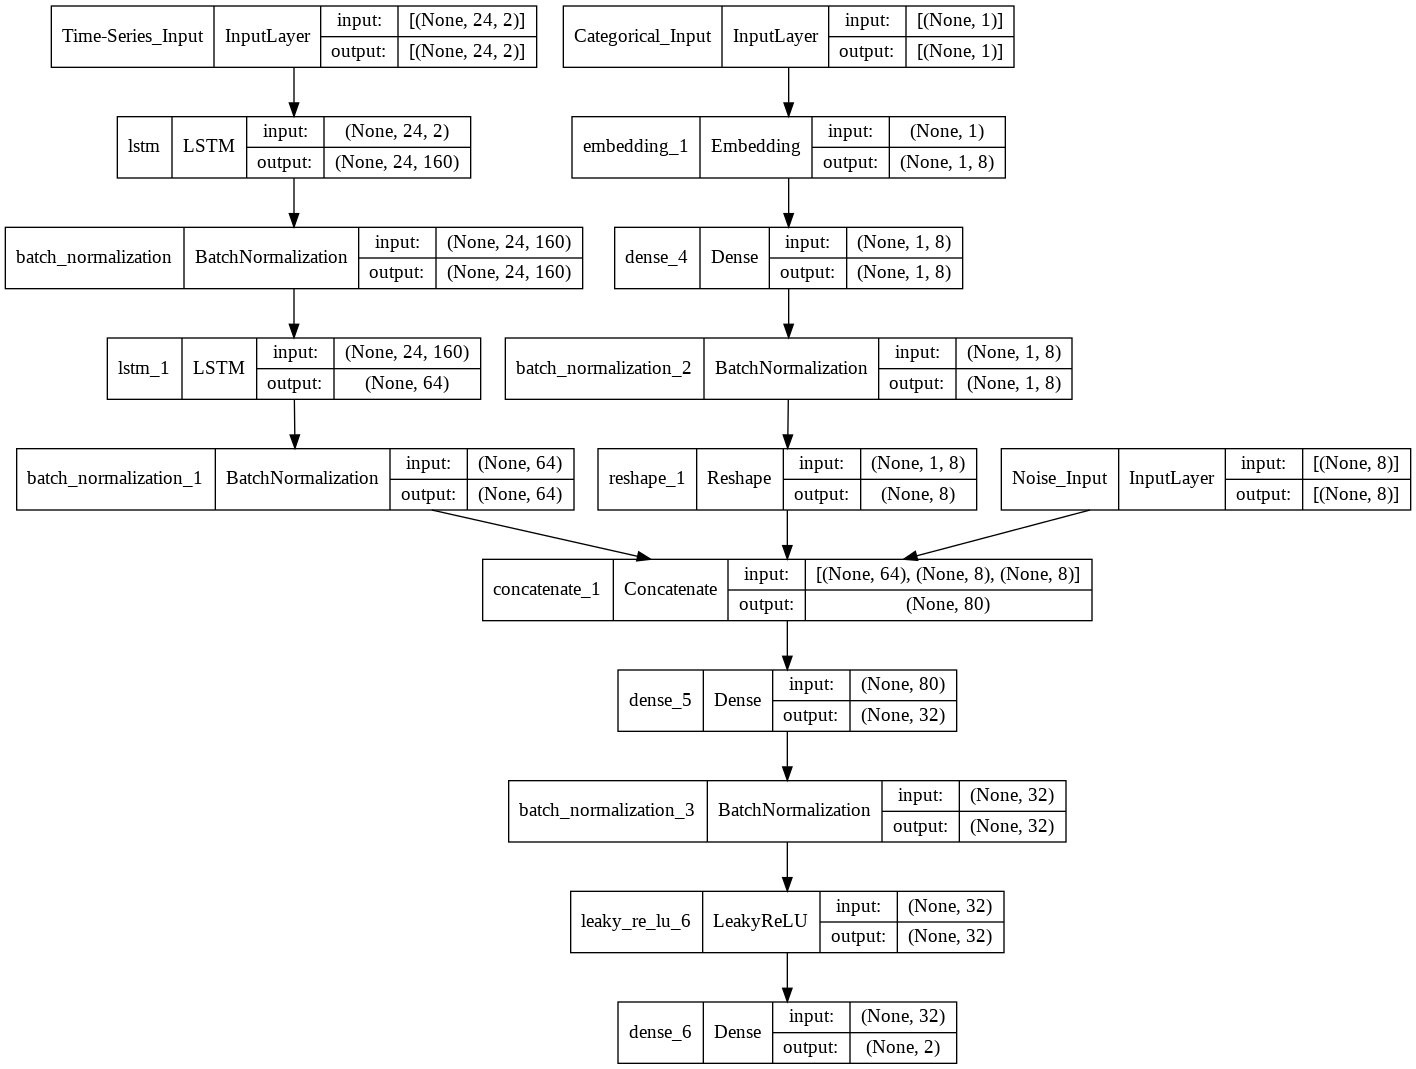

In [ ]:
g_model = define_generator(latent_dim=8, in_shape=(24, 2), n_classes=35)
plot_model(g_model, show_shapes=True)

## Training


In [ ]:
# size of the latent space
latent_dim = 8
# create the critic
d_model = define_critic(in_shape=(25, 2), n_classes=35)
print('Createdy_next_step the Discriminator Model')
# create the generator
g_model = define_generator(latent_dim=latent_dim, in_shape=(24, 2), n_classes=35)
print('Created the Generator Model')
# Epochs to train
epochs = 300
# Callbacks
cbk = GANMonitor(num_test=X_val_len, latent_dim=latent_dim)
# Get the wgan model
wgan = WGAN(
    discriminator=d_model,
    generator=g_model,
    latent_dim=latent_dim,
    discriminator_extra_steps=1,
)
# Compile the wgan model
wgan.compile(
    d_optimizer=d_opt_AdaBelief,
    g_optimizer=g_opt_AdaBelief,
    g_loss_fn=generator_loss,
    d_loss_fn=discriminator_loss,
)
# Start training
X_to_fit = np.concatenate((X_train,y_train),axis=1)
history = wgan.fit(x=X_to_fit, y=label_train, batch_size=64, epochs=epochs, callbacks=[cbk])

## Scenario Generation

In [ ]:
n_model = 45
latent_dim = 8

selected_generator = define_generator(latent_dim=latent_dim, in_shape=(24, 2), n_classes=35)
selected_critic = define_critic(in_shape=(25, 2), n_classes=35)

model_gen_name = '/content/drive/My Drive/TFM/Experiments/' + '/gen_model_' + str(n_model) + '_KL_Pinball_MSE'

selected_generator.load_weights(model_gen_name)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Time-Series_Input (InputLayer)  [(None, 24, 2)]     0           []                               
                                                                                                  
 Categorical_Input (InputLayer)  [(None, 1)]         0           []                               
                                                                                                  
 lstm_2 (LSTM)                  (None, 24, 160)      104320      ['Time-Series_Input[0][0]']      
                                                                                                  
 embedding_2 (Embedding)        (None, 1, 8)         280         ['Categorical_Input[0][0]']      
                                                                                            

### +/- measures

In [ ]:
KLs = np.array([])
Pinballs_temp = np.array([])
Pinballs_hum = np.array([])
MSEs_temp = np.array([])
MSEs_humid = np.array([])

for n_tests in range(15):
  n_prediction = 24
  n_samples = X_test_len

  # Get predictions
  X_aux_2 = np.copy(X_test)
  for p in range(n_prediction):
    noise_input = tf.random.normal(shape=(n_samples, latent_dim), mean=0.0, stddev=2.5)
    y_gen_ = selected_generator.predict([X_aux_2, label_test, noise_input]) #Step 1: Predict [val_len,2]
    y_gen = y_gen_[:,np.newaxis,:] #[val_len,1,2]
    if p == 0: #Step 2: Save prediction
      y_gen_final = y_gen.copy() 
    else:
      y_gen_final = np.concatenate((y_gen_final, y_gen), axis=1)
    X_aux = X_aux_2[:,1:,:] #Step 3: Put prediction in Condition Time-series
    X_aux_2 = np.concatenate((X_aux,y_gen), axis=1) 

  # invert scale
  y_real_inv = np.empty(y_test_real_long.shape)
  y_gen_inv = np.empty(y_gen_final.shape)
  X_cond_inv = np.empty(X_test.shape)
  for s in range(n_samples):
    for r in range(n_prediction):
      y_real_inv[s,r,0] = (y_test_real_long[s,r,0] - a)*(diff_temp/(b-a)) +(min_temp)
      y_real_inv[s,r,1] = (y_test_real_long[s,r,1] - a)*(diff_humid/(b-a))+(min_humid)
      y_gen_inv[s,r,0] = (y_gen_final[s,r,0] - a)*(diff_temp/(b-a)) +(min_temp)
      y_gen_inv[s,r,1] = (y_gen_final[s,r,1] - a)*(diff_humid/(b-a))+(min_humid)
    for t in range(n_prediction):
      X_cond_inv[s,t,0] = (X_test[s,t,0] - a)*(diff_temp/(b-a)) +(min_temp)
      X_cond_inv[s,t,1] = (X_test[s,t,1] - a)*(diff_humid/(b-a))+(min_humid)
    
  temp_real = y_real_inv[:,:,0]
  flat_temp_real = temp_real.flatten()
  temp_gen = y_gen_inv[:,:,0]
  flat_temp_gen = temp_gen.flatten()
  humid_real = y_real_inv[:,:,1]
  flat_humid_real = humid_real.flatten()
  humid_gen = y_gen_inv[:,:,1]
  flat_humid_gen = humid_gen.flatten()

  ### METRICS ###

  # KL divergence with 2D histogram
  H_compute_bins_temp = np.histogram(flat_temp_real, bins='auto')
  H_compute_bins_humid = np.histogram(flat_humid_real, bins='auto')
  n_bins_temp = H_compute_bins_humid[0].shape[0]
  n_bins_humid = H_compute_bins_humid[0].shape[0]
  # If we add more than 2 variables we will need to use np.histogramdd
  H_real, xedges_real, yedges_real = np.histogram2d(flat_temp_real, flat_humid_real, bins=[n_bins_temp,n_bins_humid])
  H_real = (np.where(H_real==0, 1e-6, H_real).flatten())/len(flat_temp_real)
  H_gen, xedges_gen, yedges_gen = np.histogram2d(flat_temp_gen, flat_humid_gen, bins=[n_bins_temp,n_bins_humid])
  H_gen = (np.where(H_gen==0, 1e-6, H_gen).flatten())/len(flat_temp_gen)
  assert isclose(sum(H_real),1.,rel_tol=1e-5)
  assert isclose(sum(H_gen), 1.,rel_tol=1e-5)
  KL_diverg = kl_divergence(H_gen,H_real)

  # Pinball Loss Function
  pinball_temp = list()
  pinball_humid = list()
  tau = [0.1, 0.3, 0.5, 0.7, 0.9]
  for t in tau:
    pinball_temp.append(pinball_func(flat_temp_real, flat_temp_gen, tau=t))
    pinball_humid.append(pinball_func(flat_humid_real, flat_humid_gen, tau=t))

  pinball_mean_temp = sum(pinball_temp)/(len(pinball_temp))
  pinball_mean_humid = sum(pinball_humid)/(len(pinball_humid))
  Pinball_mean = (pinball_mean_temp + pinball_mean_humid)/2

  #MSE
  MSE_temp = mean_absolute_error(flat_temp_real, flat_temp_gen)
  MSE_humid = mean_absolute_error(flat_humid_real, flat_humid_gen)

  #append values
  KLs = np.append(KLs, KL_diverg)
  Pinballs_temp = np.append(Pinballs_temp, pinball_mean_temp)
  Pinballs_hum = np.append(Pinballs_hum, pinball_mean_humid)
  MSEs_temp = np.append(MSEs_temp, MSE_temp)
  MSEs_humid = np.append(MSEs_humid, MSE_humid)

  print(n_tests)

RMSEs_temp = np.sqrt(MSEs_temp)
RMSEs_humid = np.sqrt(MSEs_humid)

mu_KLs = np.mean(KLs)
std_KLs = np.std(KLs)
mu_P_t = np.mean(Pinballs_temp)
std_P_t = np.std(Pinballs_temp)
mu_P_h = np.mean(Pinballs_hum)
std_P_h = np.std(Pinballs_hum)
mu_M_t = np.mean(MSEs_temp)
std_M_t = np.std(MSEs_temp)
mu_R_t = np.mean(RMSEs_temp)
std_R_t = np.std(RMSEs_temp)
mu_M_h = np.mean(MSEs_humid)
std_M_h = np.std(MSEs_humid)
mu_R_h = np.mean(RMSEs_humid)
std_R_h = np.std(RMSEs_humid)

print(f'KL: {mu_KLs} ± {std_KLs} bits')
print(f'Pinball Temp: {mu_P_t} ± {std_P_t}')
print(f'Pinball Humid: {mu_P_h} ± {std_P_h}')
print(f'MSE Temp: {mu_M_t} ± {std_M_t} ºC²')
print(f'RMSE Temp: {mu_R_t} ± {std_R_t} ºC')
print(f'MSE Humid: {mu_M_h} ± {std_M_h} %²')
print(f'RMSE Humid: {mu_R_h} ± {std_R_h} %')

In [ ]:
KLs

### Validation data vs. Real data with the selected model

In [ ]:
flat_temp_real = np.load('45_temp_real.npy').flatten()
flat_temp_gen = np.load('45_temp_gen.npy').flatten()
flat_humid_real = np.load('45_humid_real.npy').flatten()
flat_humid_gen = np.load('45_humid_gen.npy').flatten()

temp_real_df = pd.DataFrame(flat_temp_real, columns=['Temperature'])
temp_real_df['Source'] = 'Real'
temp_gen_df = pd.DataFrame(flat_temp_gen, columns=['Temperature'])
temp_gen_df['Source'] = 'Generated'
temp_df = pd.concat([temp_real_df, temp_gen_df])

plt.figure(figsize=(12,5.5))
sns.histplot(data=temp_df, x='Temperature', bins='auto', hue='Source').set(title='Temp Real / Generated Distributions - 24 time-steps predictions')

humid_real_df = pd.DataFrame(flat_humid_real, columns=['Humidity'])
humid_real_df['Source'] = 'Real'
humid_gen_df = pd.DataFrame(flat_humid_gen, columns=['Humidity'])
humid_gen_df['Source'] = 'Generated'
humid_df = pd.concat([humid_real_df, humid_gen_df])

plt.figure(figsize=(12,5.5))
sns.histplot(data=humid_df, x='Humidity', bins='auto', hue='Source').set(title='Humid Real / Generated Distributions - 24 time-steps predictions')

In [ ]:
temp_real_df = pd.DataFrame(flat_temp_real, columns=['Temperature'])
temp_real_df['Source'] = 'Real'
temp_gen_df = pd.DataFrame(flat_temp_gen, columns=['Temperature'])
temp_gen_df['Source'] = 'Generated'
temp_df = pd.concat([temp_real_df, temp_gen_df])

humid_real_df = pd.DataFrame(flat_humid_real, columns=['Humidity'])
humid_gen_df = pd.DataFrame(flat_humid_gen, columns=['Humidity'])
humid_df = pd.concat([humid_real_df, humid_gen_df])

temp_df['Humidity'] = humid_df

In [ ]:
plt.figure(figsize=(10,10))
g = sns.JointGrid(data=temp_df, x='Humidity', y='Temperature', height=7, hue='Source')
g.plot_joint(sns.scatterplot, s=0.3)
g.plot_marginals(sns.boxplot)

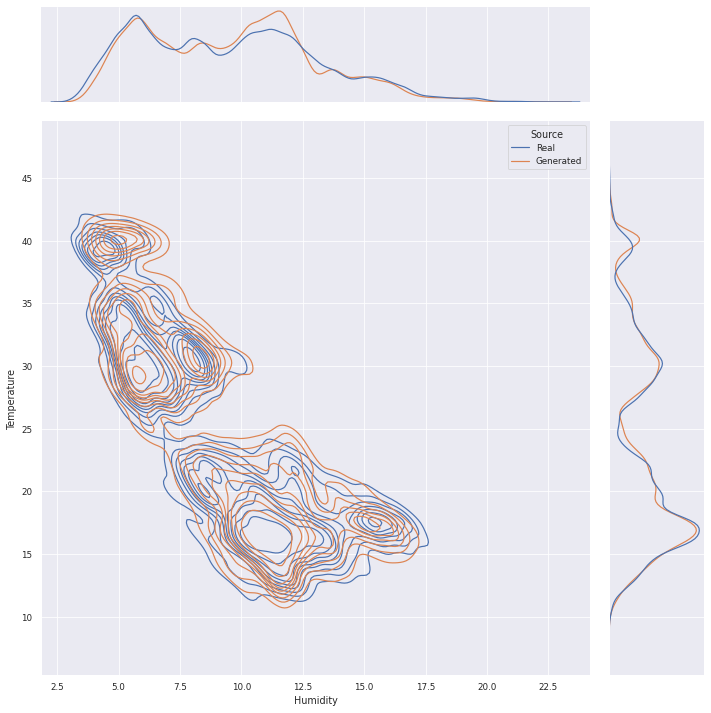

In [ ]:
sns.jointplot(data=temp_df, x='Humidity', y='Temperature',  hue='Source', kind='kde', height=10, thresh=0.12, fill=False)

### Random Exploration of Latent Space

In [ ]:
n_samples = 20
n_scenarios = 6
n_prediction = 24

# Get real values
max_ix = 9999999
security_margin = len(list_ix) - (n_steps_in) 
while (max_ix > security_margin):
  ix_plot = np.random.choice(X_val_range, n_samples, replace=False)
  max_ix = np.amax(ix_plot)

X_cond = np.copy(X_sc[ix_plot])
X_label = np.copy(label_sc[ix_plot])
y_real = np.empty([n_samples, n_prediction, 2])
for k, index in enumerate(ix_plot):
  index_plus = index + n_prediction
  y_real_ = y_sc[index:index_plus, :, :]
  y_real_ = y_real_.reshape(1, n_prediction, 2)
  y_real[k,:,:] = y_real_
print(f'y_real shape {y_real.shape}')

# Get predictions
# Final shape: [n_samples, n_scenarios, lenght, 2]
for scen in range(n_scenarios):
  X_aux_2 = np.copy(X_cond)
  for p in range(n_prediction):
    noise_input = tf.random.normal(shape=(n_samples, latent_dim), mean=0.0, stddev=2.8)
    y_gen_ = selected_generator.predict([X_aux_2, X_label, noise_input]) #Step 1: Predict [n_samples,2]
    y_gen = y_gen_[:,np.newaxis,:] #[n_samples,1,2]
    if p == 0: #Step 2: Save prediction
      y_gen_final = np.copy(y_gen)
    else:
      y_gen_final = np.concatenate((y_gen_final, y_gen), axis=1)
    X_aux = X_aux_2[:,1:,:] #Step 3: Put prediction in Condition Time-series
    X_aux_2 = np.concatenate((X_aux,y_gen), axis=1) 
  y_gen_final_aux = y_gen_final[:, np.newaxis, :, :]
  if scen == 0:
    y_gen_final_final = np.copy(y_gen_final_aux)
  else:
    y_gen_final_final = np.concatenate((y_gen_final_final, y_gen_final_aux), axis=1)

print(f'y generated shape: {y_gen_final_final.shape}') #shape: [20, 10, 24, 2]

# invert scale
y_real_inv = np.empty(y_real.shape)
y_gen_inv = np.empty(y_gen_final_final.shape)
X_cond_inv = np.empty(X_cond.shape)
#real
for s in range(n_samples):
  for r in range(n_prediction):
    y_real_inv[s,r,0] = (y_real[s,r,0] - a)*(diff_temp/(b-a)) +(min_temp)
    y_real_inv[s,r,1] = (y_real[s,r,1] - a)*(diff_humid/(b-a))+(min_humid)
  for t in range(n_prediction):
    X_cond_inv[s,t,0] = (X_cond[s,t,0] - a)*(diff_temp/(b-a)) +(min_temp)
    X_cond_inv[s,t,1] = (X_cond[s,t,1] - a)*(diff_humid/(b-a))+(min_humid)
#generated
for s in range(n_samples): #20
  for q in range(n_scenarios): #10
    for r in range(n_prediction): #24
      y_gen_inv[s,q,r,0] = (y_gen_final_final[s,q,r,0] - a)*(diff_temp/(b-a)) +(min_temp)
      y_gen_inv[s,q,r,1] = (y_gen_final_final[s,q,r,1] - a)*(diff_humid/(b-a))+(min_humid)

# plot images
for i in range(n_samples):
  print(f'Sensor #{X_label[i]}')
  for j in range(2):
    fig,axs = plt.subplots(1,2,sharey=True,sharex=True,figsize=(15,5),gridspec_kw={'wspace': 0.03})
    axs[0].plot(X_cond_inv[i,:,j], marker='.', ms=8)
    name = dict_variables[j] + ' - Input'
    axs[0].set_title(name, fontsize=16)
    axs[1].plot(y_real_inv[i,:,j], marker='.', ms=8)
    for img in range(n_scenarios):
      axs[1].plot(y_gen_inv[i,img,:,j], linestyle='--')
    axs[1].legend(['Ground Truth','Scenario 1', 'Scenario 2', 'Scenario 3', 'Scenario 4', 'Scenario 5', 'Scenario 6'], fontsize='10')
    axs[1].set_title(dict_variables[j] + ' - Output (Ground Truth: blue)', fontsize=12)
    plt.show()
    plt.close()


Output hidden; open in https://colab.research.google.com to view.

### Anomaly

In [ ]:
n_plots = 100
n_samples = 1
n_scenarios = 6
n_prediction = 24
#Anomaly
sigma_temp = (b-a)*1.2/(diff_temp)
sigma_humid = (b-a)*0.45/(diff_humid)
sigma_factor = 0.3

for _ in range(n_plots):
  # Get real values
  max_ix = 9999999
  security_margin = len(list_ix) - (n_steps_in) 
  while (max_ix > security_margin):
    ix_plot = np.random.choice(test_ix, n_samples, replace=False)
    max_ix = np.amax(ix_plot)

  X_cond = np.copy(X_sc[ix_plot])
  X_label = np.copy(label_sc[ix_plot])
  y_real = np.empty([n_samples, n_prediction, 2])
  for k, index in enumerate(ix_plot):
    index_plus = index + n_prediction
    y_real_ = y_sc[index:index_plus, :, :]
    y_real_ = y_real_.reshape(1, n_prediction, 2)
    y_real[k,:,:] = y_real_
  print(f'y_real shape {y_real.shape}')

  # Get predictions
  # Final shape: [n_samples, n_scenarios, lenght, 2]
  for scen in range(n_scenarios):
    X_aux_2 = np.copy(X_cond)
    for p in range(n_prediction):
      # Anomaly
      if p == 9:
        while True:
          noise_input = tf.random.normal(shape=(n_samples, latent_dim), mean=0.0, stddev=10)
          temp_before = y_gen_final[:,-1,0]
          humid_before = y_gen_final[:,-1,1]
          y_gen_ = selected_generator.predict([X_aux_2, X_label, noise_input]) #Step 1: Predict [n_samples,2] 
          #diff_anomaly_temp = np.absolute(y_gen_[:,0] - temp_before)
          #diff_anomaly_humid = np.absolute(y_gen_[:,1] - humid_before)
          diff_anomaly_temp = y_gen_[:,0] - temp_before
          mean_diff_anomaly_temp = np.mean(diff_anomaly_temp)
          diff_anomaly_humid = y_gen_[:,1] - humid_before
          mean_diff_anomaly_humid = np.mean(diff_anomaly_humid)
          # print(np.mean(diff_anomaly_temp), np.mean(diff_anomaly_humid))
          if ((mean_diff_anomaly_temp > sigma_temp*sigma_factor) and (mean_diff_anomaly_humid < -(sigma_humid*sigma_factor)) or ((mean_diff_anomaly_temp < -(sigma_temp*sigma_factor)) and (mean_diff_anomaly_humid > sigma_humid*sigma_factor))):
            y_gen = y_gen_[:,np.newaxis,:] #[n_samples,1,2]     
            break
      else:
        noise_input = tf.random.normal(shape=(n_samples, latent_dim), mean=0.0, stddev=2.8)
        y_gen_ = selected_generator.predict([X_aux_2, X_label, noise_input]) #Step 1: Predict [n_samples,2]
        y_gen = y_gen_[:,np.newaxis,:] #[n_samples,1,2]
      if p == 0: #Step 2: Save prediction
        y_gen_final = np.copy(y_gen)
      else:
        y_gen_final = np.concatenate((y_gen_final, y_gen), axis=1)
      X_aux = X_aux_2[:,1:,:] #Step 3: Put prediction in Condition Time-series
      X_aux_2 = np.concatenate((X_aux,y_gen), axis=1) 
    y_gen_final_aux = y_gen_final[:, np.newaxis, :, :]
    if scen == 0:
      y_gen_final_final = np.copy(y_gen_final_aux)
    else:
      y_gen_final_final = np.concatenate((y_gen_final_final, y_gen_final_aux), axis=1)

  print(f'y generated shape: {y_gen_final_final.shape}') #shape: [20, 10, 24, 2]

  # invert scale
  y_real_inv = np.empty(y_real.shape)
  y_gen_inv = np.empty(y_gen_final_final.shape)
  X_cond_inv = np.empty(X_cond.shape)
  #real
  for s in range(n_samples):
    for r in range(n_prediction):
      y_real_inv[s,r,0] = (y_real[s,r,0] - a)*(diff_temp/(b-a)) +(min_temp)
      y_real_inv[s,r,1] = (y_real[s,r,1] - a)*(diff_humid/(b-a))+(min_humid)
    for t in range(n_prediction):
      X_cond_inv[s,t,0] = (X_cond[s,t,0] - a)*(diff_temp/(b-a)) +(min_temp)
      X_cond_inv[s,t,1] = (X_cond[s,t,1] - a)*(diff_humid/(b-a))+(min_humid)
  #generated
  for s in range(n_samples): #20
    for q in range(n_scenarios): #10
      for r in range(n_prediction): #24
        y_gen_inv[s,q,r,0] = (y_gen_final_final[s,q,r,0] - a)*(diff_temp/(b-a)) +(min_temp)
        y_gen_inv[s,q,r,1] = (y_gen_final_final[s,q,r,1] - a)*(diff_humid/(b-a))+(min_humid)

  # plot images
  for i in range(n_samples):
    print(f'Sensor #{X_label[i]}')
    for j in range(2):
      fig,axs = plt.subplots(1,2,sharey=True,sharex=True,figsize=(15,5),gridspec_kw={'wspace': 0.03})
      axs[0].plot(X_cond_inv[i,:,j], marker='.', ms=8)
      name = dict_variables[j] + ' - Input'
      axs[0].set_title(name, fontsize=16)
      axs[1].plot(y_real_inv[i,:,j], marker='.', ms=8)
      for img in range(n_scenarios):
        axs[1].plot(y_gen_inv[i,img,:,j], linestyle='--')
      axs[1].legend(['Ground Truth','Scenario 1', 'Scenario 2', 'Scenario 3', 'Scenario 4', 'Scenario 5', 'Scenario 6'], fontsize='10')
      axs[1].set_title(dict_variables[j] + ' - Output (Ground Truth: blue)', fontsize=12)
      plt.show()
      plt.close()


Output hidden; open in https://colab.research.google.com to view.

### MH-GAN


In [ ]:
# calibrate the discriminator with Isotonic Regression
from sklearn.isotonic import IsotonicRegression

calibrator = IsotonicRegression(0,1)

# take 20% of training set to calibrate
n_samples = round(len(list_ix)*0.2)
ix_plot = np.random.choice(list_ix[:-24], n_samples, replace=False)
X_cond = np.copy(X_sc[ix_plot])
X_label = np.copy(label_sc[ix_plot])
y_test = np.copy(y_sc[ix_plot])

noise_calibrate = tf.random.normal(shape=(n_samples, latent_dim))
test_gen_ = selected_generator.predict([X_cond,X_label,noise_calibrate]) # [n_samples, 2]
test_gen = test_gen_[:,np.newaxis,:] #[n_samples,1,2]
input_cal_gen = np.concatenate((X_cond,test_gen), axis=1)  #shape:[n_samples,25,2]
print(input_cal_gen.shape)
# real test input to discriminator
input_cal_real = np.concatenate((X_cond,y_test), axis=1) #shape:[n_samples,25,2]
print(input_cal_real.shape)
# concatenate gen and real
input_cal = np.concatenate((input_cal_real,input_cal_gen), axis=0)
input_label = np.concatenate((X_label,X_label), axis=0)
# predict
predict_cal = selected_critic.predict([input_cal, input_label]).reshape((n_samples*2,))
print(predict_cal.shape)
y_cal = np.array([0]*n_samples + [1]*n_samples)
# fit calibrator
calibrator.fit(predict_cal, y_cal)

(25153, 25, 2)
(25153, 25, 2)
(50306,)


IsotonicRegression(increasing=True, out_of_bounds='nan', y_max=1, y_min=0)

In [ ]:
def calibrated_score(X, label, calibrator):
  s = selected_critic.predict([X, label]).reshape((X.shape[0],)) # [X.shape[0],]
  return calibrator.transform(s) # [X.shape, 1]

In [ ]:
n_prediction = 24
n_samples = 50
n_scenarios = 6
n_steps_MH_GAN = 20

# get random samples (index)
ix = random.sample(list_ix[:-24], k=n_samples)

# final numpy arrays
y_real_final = np.empty([n_samples,n_prediction,2]) #shape:[10,12,2]

# real values
for k, index in enumerate(ix):
  index_plus = index + n_prediction
  y_real_ = y_sc[index:index_plus, :, :]
  y_real_ = y_real_.reshape(1, n_prediction, 2)
  y_real_final[k,:,:] = y_real_
print(f'y_real shape {y_real_final.shape}')

X_cond = np.copy(X_sc[ix])
X_label = np.copy(label_sc[ix])

# get predictions
y_gen_final = np.empty([n_samples, n_scenarios, n_prediction, 2])
for n in range(n_samples):
  X_aux_2 = X_cond[n].reshape(1,24,2)
  X_label_in = X_label[n].reshape(1,)
  for scen in range(n_scenarios):
    for p in range(n_prediction): 
      # initial real sample
      ix_init = random.sample(list_ix[:-24], k=1)
      X_ = X_sc[ix_init] #[1,24,2]
      y = y_sc[ix_init] #[1, 1,2]
      X = np.concatenate((X_,y), axis=1)
      X_label_init = label_sc[ix_init]
      y_score = calibrated_score(X, X_label_init, calibrator) #[1,1]
      for iter in range(n_steps_MH_GAN): #number of tries of new vector inputs
        # generate sample
        noise_point = tf.random.normal(shape=(1, latent_dim), stddev=2.3) #shape:[1,Latent_dim]
        if iter == 0:
          selected_noise_point = noise_point
        y_gen_MH_GAN_ = selected_generator.predict([X_aux_2, X_label_in, noise_point]) #Step 1: Predict [1,2]
        y_gen_MH_GAN = y_gen_MH_GAN_[:,np.newaxis,:] #[1,1,2]
        In_MH_GAN = np.concatenate((X_aux_2,y_gen_MH_GAN), axis=1)  #shape:[1,25,2]
        Scores_MH_GAN = calibrated_score(In_MH_GAN, X_label_in, calibrator)  #shape:[1,]
        u = np.random.uniform(0,1)
        if u >= np.fmin(1, ( (1/y_score - 1)/(1/Scores_MH_GAN - 1))):
          print('JUMP!')
          y_score = Scores_MH_GAN
          selected_noise_point = noise_point

      y_gen_ = selected_generator.predict([X_aux_2, X_label_in, selected_noise_point]) #Step 1: Predict [1,2]
      y_gen = y_gen_[:,np.newaxis,:] #[1,1,2]
      y_gen_final[n,scen,p,:] = y_gen_ #Step 2: Save prediction
      X_aux = X_aux_2[:,1:,:] #Step 3: Put prediction in Condition Time-series
      X_aux_2 = np.concatenate((X_aux,y_gen), axis=1) 
    X_aux_2 = X_cond[n].reshape(1,24,2)
  print(f'Working... {(100/n_samples)*(n+1)}%')

print(y_gen_final.shape) #shape: [6, 10, 24, 2]

# invert scale
y_real_inv = np.empty(y_real_final.shape)
y_gen_inv = np.empty(y_gen_final.shape)
X_cond_inv = np.empty(X_cond.shape)
#real
for s in range(n_samples):
  for r in range(n_prediction):
    y_real_inv[s,r,0] = (y_real_final[s,r,0] - a)*(diff_temp/(b-a)) +(min_temp)
    y_real_inv[s,r,1] = (y_real_final[s,r,1] - a)*(diff_humid/(b-a))+(min_humid)
  for t in range(24):
    X_cond_inv[s,t,0] = (X_cond[s,t,0] - a)*(diff_temp/(b-a)) +(min_temp)
    X_cond_inv[s,t,1] = (X_cond[s,t,1] - a)*(diff_humid/(b-a))+(min_humid)
#generated
for s in range(n_samples): #20
  for q in range(n_scenarios): #10
    for r in range(n_prediction): #24
      y_gen_inv[s,q,r,0] = (y_gen_final[s,q,r,0] - a)*(diff_temp/(b-a)) +(min_temp)
      y_gen_inv[s,q,r,1] = (y_gen_final[s,q,r,1] - a)*(diff_humid/(b-a))+(min_humid)

# plot images
for i in range(n_samples):
  print(f'Sensor #{X_label[i]}')
  for j in range(2):
    fig,axs = plt.subplots(1,2,sharey=True,sharex=True,figsize=(15,5),gridspec_kw={'wspace': 0.03})
    axs[0].plot(X_cond_inv[i,:,j], marker='.', ms=8)
    name = dict_variables[j] + ' - Input'
    axs[0].set_title(name, fontsize=16)
    axs[1].plot(y_real_inv[i,:,j], marker='.', ms=8)
    for img in range(n_scenarios):
      axs[1].plot(y_gen_inv[i,img,:,j], linestyle='--')
    axs[1].set_title(dict_variables[j] + ' - Output (Ground Truth: blue)', fontsize=16)
    plt.show()
    plt.close()

In [ ]:
n_prediction = 24
n_samples = 50
n_scenarios = 6
n_steps_MH_GAN = 20

# get random samples (index)
ix = random.sample(list_ix[:-24], k=n_samples)

# final numpy arrays
y_real_final = np.empty([n_samples,n_prediction,2]) #shape:[10,12,2]

# real values
for k, index in enumerate(ix):
  index_plus = index + n_prediction
  y_real_ = y_sc[index:index_plus, :, :]
  y_real_ = y_real_.reshape(1, n_prediction, 2)
  y_real_final[k,:,:] = y_real_
print(f'y_real shape {y_real_final.shape}')

X_cond = np.copy(X_sc[ix])
X_label = np.copy(label_sc[ix])

# get predictions
y_gen_final = np.empty([n_samples, n_scenarios, n_prediction, 2])
for n in range(n_samples):
  X_aux_2 = X_cond[n].reshape(1,24,2)
  X_label_in = X_label[n].reshape(1,)
  for scen in range(n_scenarios):
    for p in range(n_prediction): 
      # initial real sample
      ix_init = random.sample(list_ix[:-24], k=1)
      X_ = X_sc[ix_init] #[1,24,2]
      y = y_sc[ix_init] #[1, 1,2]
      X = np.concatenate((X_,y), axis=1)
      X_label_init = label_sc[ix_init]
      y_score = calibrated_score(X, X_label_init, calibrator) #[1,1]
      if p == 10:
        n_steps_MH_GAN = 1
      else:
        n_steps_MH_GAN = 20
      for iter in range(n_steps_MH_GAN): #number of tries of new vector inputs
        # generate sample
        if p == 10:
          noise_point = tf.random.normal(shape=(1, latent_dim), stddev=10) #shape:[1,Latent_dim]
        else:
          noise_point = tf.random.normal(shape=(1, latent_dim), stddev=2.3) #shape:[1,Latent_dim]

        if iter == 0:
          selected_noise_point = noise_point
        y_gen_MH_GAN_ = selected_generator.predict([X_aux_2, X_label_in, noise_point]) #Step 1: Predict [1,2]
        y_gen_MH_GAN = y_gen_MH_GAN_[:,np.newaxis,:] #[1,1,2]
        In_MH_GAN = np.concatenate((X_aux_2,y_gen_MH_GAN), axis=1)  #shape:[1,25,2]
        Scores_MH_GAN = calibrated_score(In_MH_GAN, X_label_in, calibrator)  #shape:[1,]
        u = np.random.uniform(0,1)
        if u >= np.fmin(1, ( (1/y_score - 1)/(1/Scores_MH_GAN - 1))):
          print('JUMP!')
          y_score = Scores_MH_GAN
          selected_noise_point = noise_point

      y_gen_ = selected_generator.predict([X_aux_2, X_label_in, selected_noise_point]) #Step 1: Predict [1,2]
      y_gen = y_gen_[:,np.newaxis,:] #[1,1,2]
      y_gen_final[n,scen,p,:] = y_gen_ #Step 2: Save prediction
      X_aux = X_aux_2[:,1:,:] #Step 3: Put prediction in Condition Time-series
      X_aux_2 = np.concatenate((X_aux,y_gen), axis=1) 
    X_aux_2 = X_cond[n].reshape(1,24,2)
  print(f'Working... {(100/n_samples)*(n+1)}%')

print(y_gen_final.shape) #shape: [6, 10, 24, 2]

# invert scale
y_real_inv = np.empty(y_real_final.shape)
y_gen_inv = np.empty(y_gen_final.shape)
X_cond_inv = np.empty(X_cond.shape)
#real
for s in range(n_samples):
  for r in range(n_prediction):
    y_real_inv[s,r,0] = (y_real_final[s,r,0] - a)*(diff_temp/(b-a)) +(min_temp)
    y_real_inv[s,r,1] = (y_real_final[s,r,1] - a)*(diff_humid/(b-a))+(min_humid)
  for t in range(24):
    X_cond_inv[s,t,0] = (X_cond[s,t,0] - a)*(diff_temp/(b-a)) +(min_temp)
    X_cond_inv[s,t,1] = (X_cond[s,t,1] - a)*(diff_humid/(b-a))+(min_humid)
#generated
for s in range(n_samples): #20
  for q in range(n_scenarios): #10
    for r in range(n_prediction): #24
      y_gen_inv[s,q,r,0] = (y_gen_final[s,q,r,0] - a)*(diff_temp/(b-a)) +(min_temp)
      y_gen_inv[s,q,r,1] = (y_gen_final[s,q,r,1] - a)*(diff_humid/(b-a))+(min_humid)

# plot images
for i in range(n_samples):
  print(f'Sensor #{X_label[i]}')
  for j in range(2):
    fig,axs = plt.subplots(1,2,sharey=True,sharex=True,figsize=(15,5),gridspec_kw={'wspace': 0.03})
    axs[0].plot(X_cond_inv[i,:,j], marker='.', ms=8)
    name = dict_variables[j] + ' - Input'
    axs[0].set_title(name, fontsize=16)
    axs[1].plot(y_real_inv[i,:,j], marker='.', ms=8)
    for img in range(n_scenarios):
      axs[1].plot(y_gen_inv[i,img,:,j], linestyle='--')
    axs[1].set_title(dict_variables[j] + ' - Output (Ground Truth: blue)', fontsize=16)
    plt.show()
    plt.close()

### Heatmap sensors and predictions

In [ ]:
n = 150

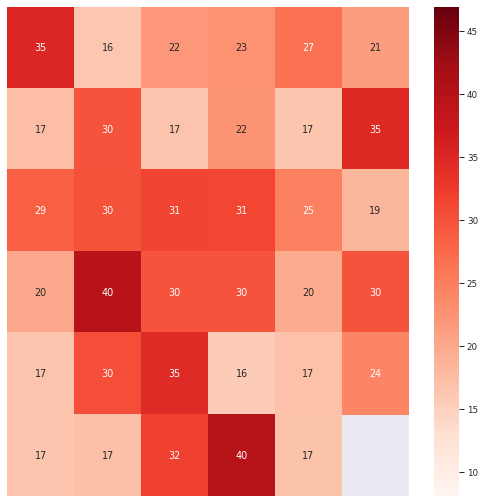

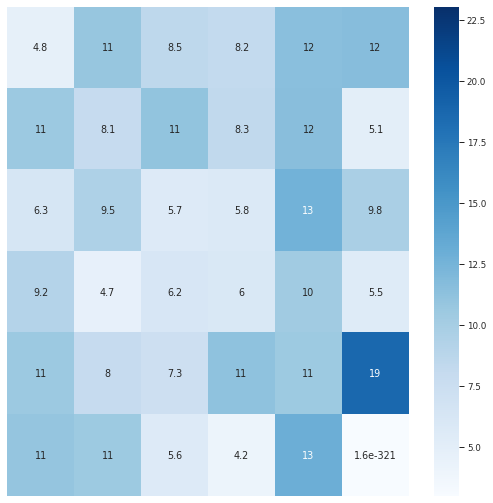

In [ ]:
Temps = np.empty([6,6])
Humids = np.empty([6,6])

for i, sensor_map in enumerate(merged_groups.values()):
  x = i % 6
  y = i // 6
  Temps[y,x] = sensor_map.iloc[n]['TEMP']
  Humids[y,x] = sensor_map.iloc[n]['HUM']

Temps[5,5] = np.NaN
Temps[5,5] = np.NaN

plt.figure(figsize=(9,9))
sns.heatmap(Temps, vmin=8.14, vmax=46.94, cmap='Reds' ,annot=True, linewidths=0, xticklabels=False, yticklabels=False)
plt.figure(figsize=(9,9))
sns.heatmap(Humids, vmin=3.0, vmax=23.03, cmap='Blues' ,annot=True, linewidths=0, xticklabels=False, yticklabels=False)

In [ ]:
n_pred = 30

for i, sensor_map in enumerate(merged_groups.values()):
  data = np.array(sensor_map.drop(columns=['ADDR']))
  input_X = data[n-24:n,:].reshape(1,24,2)
  input_label = np.array(i).reshape(1,)
  output_y = data[n:n+n_pred,:].reshape(1,n_pred,2)
  # Scale
  input_X_sc = np.empty(input_X.shape)
  for j in range(24):
    input_X_sc[0,j,0] = ((b-a)*(input_X[0,j,0] - min_temp) /(diff_temp) ) + a
    input_X_sc[0,j,1] = ((b-a)*(input_X[0,j,1] - min_humid)/(diff_humid)) + a
  #insert values
  if i == 0:
    X_cond = input_X.copy()
    X_cond_sc = input_X_sc.copy()
    X_label = input_label.copy()
    y_real = output_y.copy()
  else:
    X_cond = np.concatenate((X_cond,input_X), axis=0)
    X_cond_sc = np.concatenate((X_cond_sc,input_X_sc), axis=0)
    X_label = np.concatenate((X_label,input_label), axis=0)
    y_real = np.concatenate((y_real,output_y),axis=0)
print(X_cond.shape)
print(X_cond_sc.shape)
print(X_label.shape)
print(y_real.shape)

(35, 24, 2)
(35, 24, 2)
(35,)
(35, 30, 2)


In [ ]:
# Get predictions
X_aux_2 = np.copy(X_cond_sc)
for p in range(n_pred):
  '''
  if p >= 9 and p < 15:
    noise_input = tf.random.normal(shape=(35, latent_dim), stddev=15.3)
  else:
    noise_input = tf.random.normal(shape=(35, latent_dim), stddev=2.3)
  '''
  noise_input = tf.random.normal(shape=(35, latent_dim), stddev=2.3)

  y_gen_ = selected_generator.predict([X_aux_2, X_label, noise_input]) #Step 1: Predict 
  y_gen = y_gen_[:,np.newaxis,:] 
  if p == 0: #Step 2: Save prediction
    y_gen_final = y_gen.copy() 
  else:
    y_gen_final = np.concatenate((y_gen_final, y_gen), axis=1)
  X_aux = X_aux_2[:,1:,:] #Step 3: Put prediction in Condition Time-series
  X_aux_2 = np.concatenate((X_aux,y_gen), axis=1) 
  
print(y_gen_final.shape)

# Invert Scale
y_gen_inv = np.empty(y_gen_final.shape)
for s in range(35):
  for r in range(n_pred):
    y_gen_inv[s,r,0] = (y_gen_final[s,r,0] - a)*(diff_temp/(b-a)) +(min_temp)
    y_gen_inv[s,r,1] = (y_gen_final[s,r,1] - a)*(diff_humid/(b-a))+(min_humid)

print(y_gen_inv.shape)

(35, 30, 2)
(35, 30, 2)


In [ ]:
# Which are the MAX and MIN of each column??
flat_temp_real = y_real[:,:,0].flatten()
flat_temp_gen = y_gen_inv[:,:,0].flatten()
flat_humid_real = y_real[:,:,1].flatten()
flat_humid_gen = y_gen_inv[:,:,1].flatten()

Max_temp = max(np.amax(flat_temp_real), np.amax(flat_temp_gen))
min_temp = min(np.amin(flat_temp_real), np.amin(flat_temp_gen))
Max_humid = max(np.amax(flat_humid_real), np.amax(flat_humid_gen))
min_humid = min(np.amin(flat_humid_real), np.amin(flat_humid_gen))

print(f'Max Temp: {Max_temp}')
print(f'min Temp: {min_humid}')
print(' ')

print(f'Max Humid: {Max_humid}')
print(f'min Humid: {min_humid}')
print(' ')

Max Temp: 40.89
min Temp: 4.15
 
Max Humid: 19.76
min Humid: 4.15
 


In [ ]:
for n in range(n_pred):  
  step_plot = n

  Temps_real = np.empty([6,6])
  Temps_gen = np.empty([6,6])
  Humids_real = np.empty([6,6])
  Humids_gen = np.empty([6,6])
  for i in range(35):
    x = i % 6
    y = i // 6
    Temps_real[y,x] = y_real[i,step_plot,0]
    Temps_gen[y,x] = y_gen_inv[i,step_plot,0]
    Humids_real[y,x] = y_real[i,step_plot,1]
    Humids_gen[y,x] = y_gen_inv[i,step_plot,1]

  Temps_real[5,5] = np.NaN
  Temps_gen[5,5] = np.NaN
  Humids_real[5,5] = np.NaN
  Humids_gen[5,5] = np.NaN

  # plot images
  fig,axs = plt.subplots(1,2,figsize=(18,7))
  axs[0].set_title(f'Heatmap Sensors - Temperature Real - Prediction Step #{step_plot+1}', fontsize=14)
  sns.heatmap(Temps_real, vmin=min_temp, vmax=Max_temp, cmap='Reds' ,annot=True, linewidths=0, xticklabels=False, yticklabels=False, ax=axs[0])
  axs[1].set_title(f'Heatmap Sensors - Temperature Fake - Prediction Step #{step_plot+1}', fontsize=14)
  sns.heatmap(Temps_gen, vmin=min_temp, vmax=Max_temp, cmap='Reds' ,annot=True, linewidths=0, xticklabels=False, yticklabels=False, ax=axs[1])
  plt.show()

  fig,axs = plt.subplots(1,2,figsize=(18,7))
  axs[0].set_title(f'Heatmap Sensors - Humidity Real - Prediction Step #{step_plot+1}', fontsize=14)
  sns.heatmap(Humids_real, vmin=min_humid, vmax=Max_humid, cmap='Blues' ,annot=True, linewidths=0, xticklabels=False, yticklabels=False, ax=axs[0])
  axs[1].set_title(f'Heatmap Sensors - Humidity Fake - Prediction Step #{step_plot+1}', fontsize=14)
  sns.heatmap(Humids_gen, vmin=min_humid, vmax=Max_humid, cmap='Blues' ,annot=True, linewidths=0, xticklabels=False, yticklabels=False, ax=axs[1])
  plt.show()

In [ ]:
# plot images and metrics
for i in range(35):
  for j in range(dim_n_vars):
    fig,axs = plt.subplots(1,dim_n_vars,sharey=True,figsize=(15,5),gridspec_kw={'wspace': 0.03})
    axs[0].plot(X_cond[i,:,j], marker='.', ms=8)
    name = dict_variables[j] + ' - Input'
    axs[0].set_title(name, fontsize=16)
    axs[1].plot(y_real[i,:,j], marker='.', ms=8)
    axs[1].plot(y_gen_inv[i,:,j], 'tab:red', marker='.', ms=8)
    axs[1].set_title('Output (red: predicted)', fontsize=16)
    plt.show()
    plt.close()
    print(dict_variables[j])
    # mean absolute error ± standard deviation
    error_np = np.subtract(y_real[i,:,j], y_gen_inv[i,:,j])
    mae = mean_absolute_error(y_real[i,:,j], y_gen_inv[i,:,j])
    std = np.std(error_np)
    print(f'MAE: {mae} ± {std}') 
    # mean squared error
    mse = mean_squared_error(y_real[i,:,j], y_gen_inv[i,:,j])
    print(f'MSE: {mse}') 
    # root mean square error
    rmse = np.sqrt(mse)
    print(f'RMSE: {rmse}') 
    # max error
    max_err = max_error(y_real[i,:,j], y_gen_inv[i,:,j])
    print(f'Max Error: {max_err}') 

### Heatmap review


In [ ]:
for i, sensor_map in enumerate(merged_groups.values()):
  sensor_map.drop(columns=['ADDR'], inplace=True)

In [ ]:
n_init = 666
n_pred = 24

for i, sensor_data in enumerate(merged_groups.values()):
  data = np.array(sensor_data)
  input_X = data[n_init-n_pred:n_init,:].reshape(1,n_pred,2)
  input_label = np.array(i).reshape(1,)
  output_y = data[n_init:n_init+n_pred,:].reshape(1,n_pred,2)
  # Scale
  input_X_sc = np.empty(input_X.shape)
  for j in range(24):
    input_X_sc[0,j,0] = ((b-a)*(input_X[0,j,0] - min_temp) /(diff_temp) ) + a
    input_X_sc[0,j,1] = ((b-a)*(input_X[0,j,1] - min_humid)/(diff_humid)) + a
  #insert values
  if i == 0:
    X_cond = input_X.copy()
    X_cond_sc = input_X_sc.copy()
    X_label = input_label.copy()
    y_real = output_y.copy()
  else:
    X_cond = np.concatenate((X_cond,input_X), axis=0)
    X_cond_sc = np.concatenate((X_cond_sc,input_X_sc), axis=0)
    X_label = np.concatenate((X_label,input_label), axis=0)
    y_real = np.concatenate((y_real,output_y),axis=0)
print(X_cond.shape)
print(X_cond_sc.shape)
print(X_label.shape)
print(y_real.shape)

(35, 24, 2)
(35, 24, 2)
(35,)
(35, 24, 2)


In [ ]:
# Get predictions
X_aux_2 = np.copy(X_cond_sc)
for p in range(n_pred):
  '''
  if p >= 9 and p < 15:
    noise_input = tf.random.normal(shape=(35, latent_dim), stddev=15.3)
  else:
    noise_input = tf.random.normal(shape=(35, latent_dim), stddev=2.3)
  '''
  noise_input = tf.random.normal(shape=(35, latent_dim), stddev=3)

  y_gen_ = selected_generator.predict([X_aux_2, X_label, noise_input]) #Step 1: Predict 
  y_gen = y_gen_[:,np.newaxis,:] 
  if p == 0: #Step 2: Save prediction
    y_gen_final = y_gen.copy() 
  else:
    y_gen_final = np.concatenate((y_gen_final, y_gen), axis=1)
  X_aux = X_aux_2[:,1:,:] #Step 3: Put prediction in Condition Time-series
  X_aux_2 = np.concatenate((X_aux,y_gen), axis=1) 
  
print(y_gen_final.shape)

# Invert Scale
y_gen_inv = np.empty(y_gen_final.shape)
for s in range(35):
  for r in range(n_pred):
    y_gen_inv[s,r,0] = (y_gen_final[s,r,0] - a)*(diff_temp/(b-a)) +(min_temp)
    y_gen_inv[s,r,1] = (y_gen_final[s,r,1] - a)*(diff_humid/(b-a))+(min_humid)

print(y_gen_inv.shape)

(35, 24, 2)
(35, 24, 2)


In [ ]:
# Which are the MAX and MIN of each column??
flat_temp_real = y_real[:,:,0].flatten()
flat_temp_gen = y_gen_inv[:,:,0].flatten()
flat_humid_real = y_real[:,:,1].flatten()
flat_humid_gen = y_gen_inv[:,:,1].flatten()

Max_temp_real = np.amax(flat_temp_real)
min_temp_real = np.amin(flat_temp_real)
Max_temp_gen = np.amax(flat_temp_gen)
min_temp_gen = np.amin(flat_temp_gen)
Max_humid_real = np.amax(flat_humid_real)
min_humid_real = np.amin(flat_humid_real)  
Max_humid_gen = np.amax(flat_humid_gen)
min_humid_gen = np.amin(flat_humid_gen)

print(f'Max Temp real: {Max_temp_real}')
print(f'min Temp real: {min_temp_real}')
print(' ')
print(f'Max Temp gen: {Max_temp_gen}')
print(f'min Temp gen: {min_temp_gen}')
print(' ')
print(f'Max Humid real: {Max_humid_real}')
print(f'min Humid real: {min_humid_real}')
print(' ')
print(f'Max Humid gen: {Max_humid_gen}')
print(f'min Humid gen: {min_humid_gen}')
print(' ')

Max Temp real: 39.85
min Temp real: 13.42
 
Max Temp gen: 41.2455425286293
min Temp gen: 14.121932699680329
 
Max Humid real: 12.81
min Humid real: 3.75
 
Max Humid gen: 12.685895612034948
min Humid gen: 3.9488399371504785
 


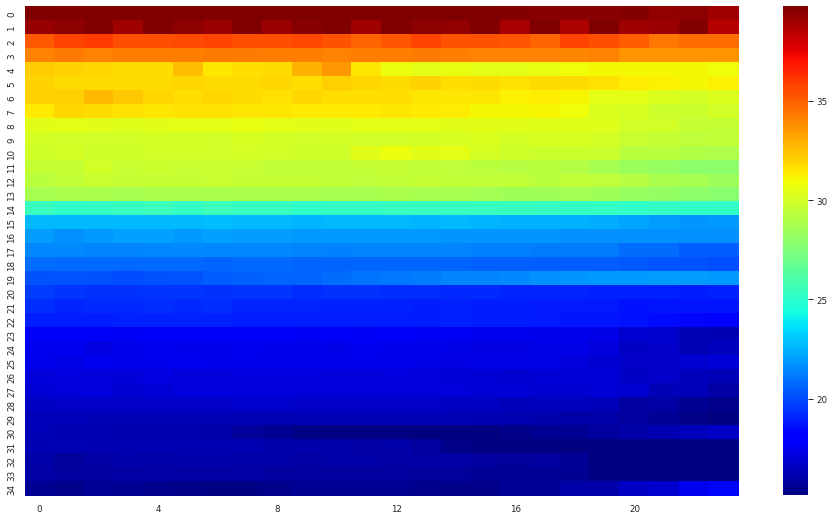

In [ ]:
plot_step = 1

plot_temp_real_ = y_real[:,:,0]
indices = list(range(0,24,plot_step))
plot_temp_real = np.take(plot_temp_real_, indices, axis=1)

sort_indices = np.argsort(plot_temp_real[:,0])[::-1]
plot_temp_real = plot_temp_real[sort_indices]

#labels = list(range(0,25,plot_step))
plt.figure(figsize=(16,9))
sns.heatmap(plot_temp_real, cmap='jet', robust=True, annot=False, linewidths=0, xticklabels=4)
#plt.xticks(range(len(labels)),labels)
plt.show()

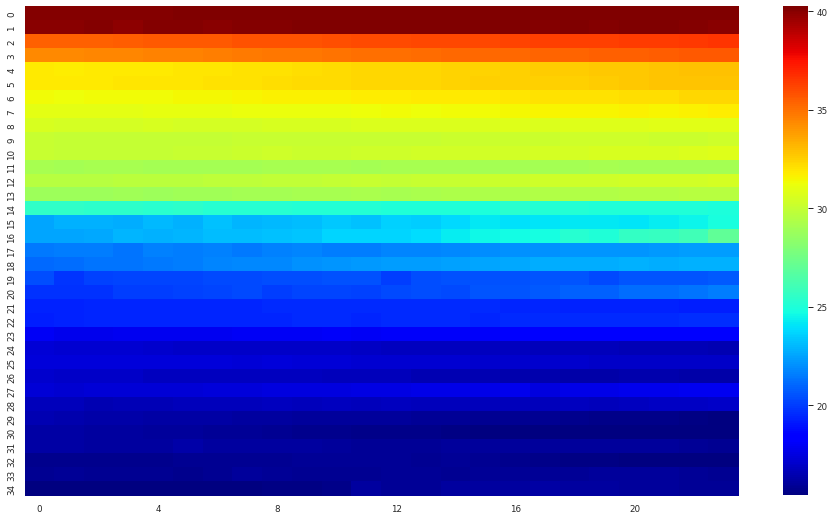

In [ ]:
plot_step = 1

plot_temp_gen_ = y_gen_inv[:,:,0]
indices = list(range(0,24,plot_step))
plot_temp_gen = np.take(plot_temp_gen_, indices, axis=1)
#labels = list(range(0,25,plot_step))
#paletos = sns.diverging_palette(220, 20, as_cmap=True)

plot_temp_gen = plot_temp_gen[sort_indices]

plt.figure(figsize=(16,9))
sns.heatmap(plot_temp_gen, cmap='jet', robust=True, annot=False, linewidths=0, xticklabels=4)
#plt.xticks(range(len(labels)),labels)
plt.show()

#### Loop

In [ ]:
import random

1362
 
Max Temp real: 41.46
min Temp real: 15.27
 
Max Temp gen: 40.31572129964828
min Temp gen: 15.991782083511353
 
Max Humid real: 19.52
min Humid real: 4.37
 
Max Humid gen: 18.616791295409204
min Humid gen: 4.399804023504258
 


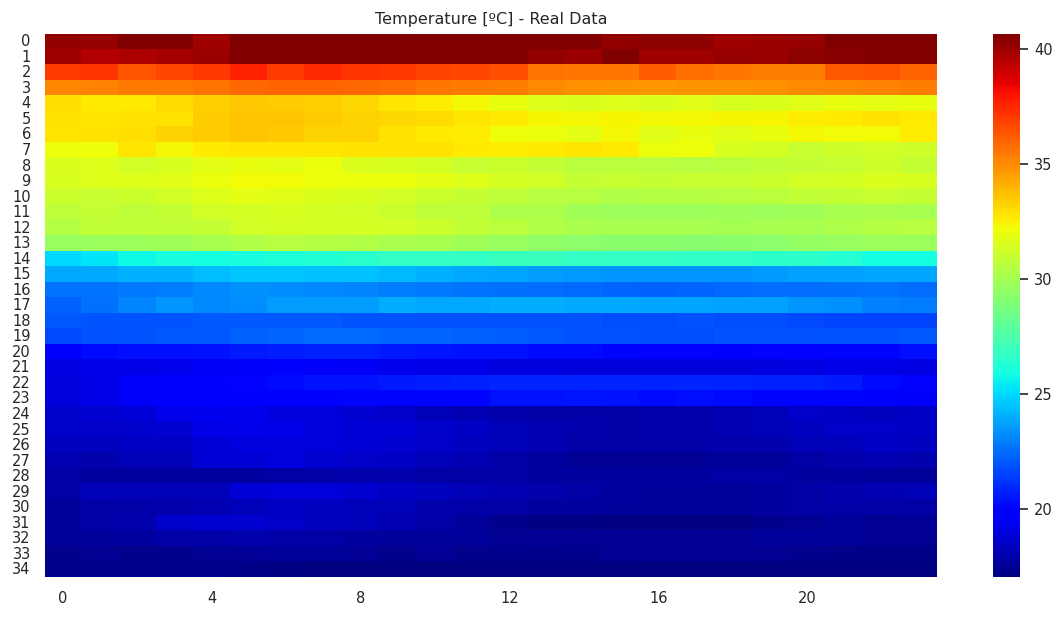

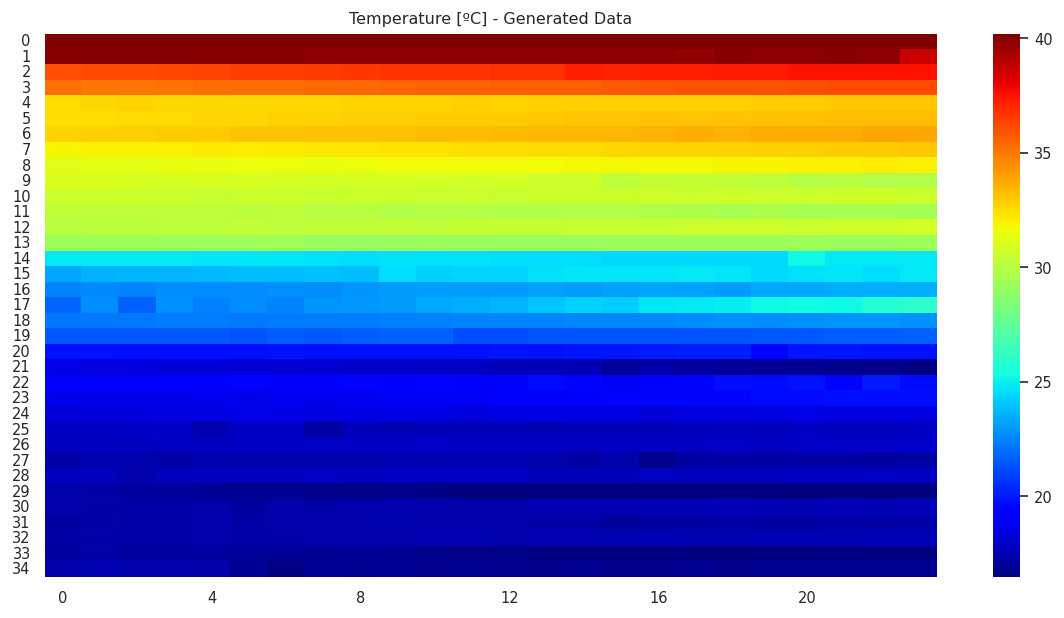

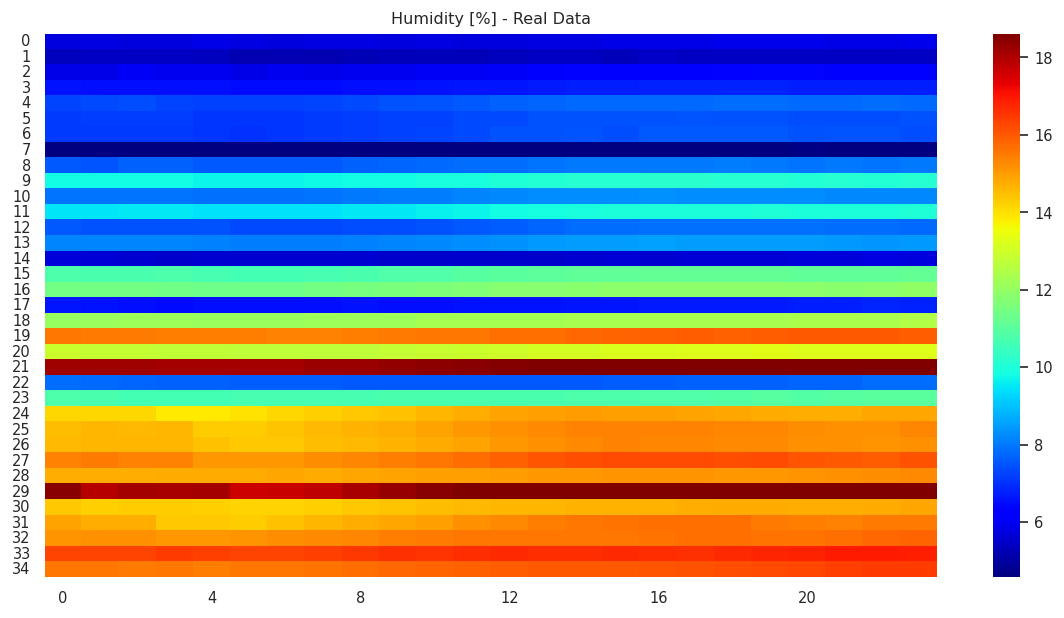

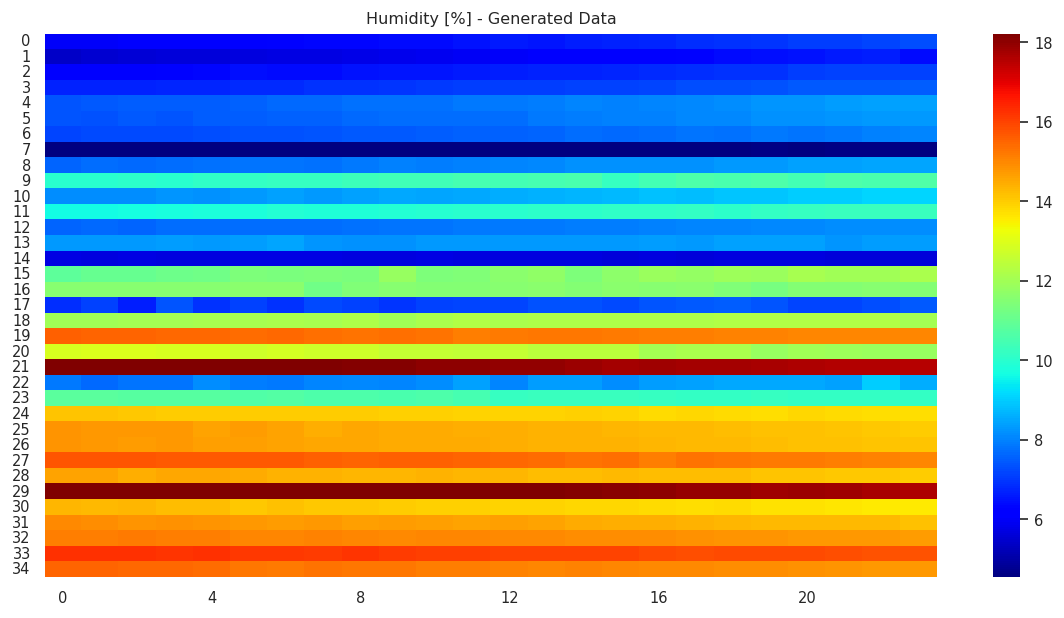

In [ ]:
min_temp_real = 20
min_temp_gen = 0

while (abs(min_temp_real-min_temp_gen))>5:
  n_init = random.randint(25,1700)
  n_pred = 24

  for i, sensor_data in enumerate(merged_groups.values()):
    data = np.array(sensor_data)
    input_X = data[n_init-n_pred:n_init,:].reshape(1,n_pred,2)
    input_label = np.array(i).reshape(1,)
    output_y = data[n_init:n_init+n_pred,:].reshape(1,n_pred,2)
    # Scale
    input_X_sc = np.empty(input_X.shape)
    for j in range(24):
      input_X_sc[0,j,0] = ((b-a)*(input_X[0,j,0] - min_temp) /(diff_temp) ) + a
      input_X_sc[0,j,1] = ((b-a)*(input_X[0,j,1] - min_humid)/(diff_humid)) + a
    #insert values
    if i == 0:
      X_cond = input_X.copy()
      X_cond_sc = input_X_sc.copy()
      X_label = input_label.copy()
      y_real = output_y.copy()
    else:
      X_cond = np.concatenate((X_cond,input_X), axis=0)
      X_cond_sc = np.concatenate((X_cond_sc,input_X_sc), axis=0)
      X_label = np.concatenate((X_label,input_label), axis=0)
      y_real = np.concatenate((y_real,output_y),axis=0)


  # Get predictions
  X_aux_2 = np.copy(X_cond_sc)
  for p in range(n_pred):
    '''
    if p >= 9 and p < 15:
      noise_input = tf.random.normal(shape=(35, latent_dim), stddev=15.3)
    else:
      noise_input = tf.random.normal(shape=(35, latent_dim), stddev=2.3)
    '''
    noise_input = tf.random.normal(shape=(35, latent_dim), stddev=3)

    y_gen_ = selected_generator.predict([X_aux_2, X_label, noise_input]) #Step 1: Predict 
    y_gen = y_gen_[:,np.newaxis,:] 
    if p == 0: #Step 2: Save prediction
      y_gen_final = y_gen.copy() 
    else:
      y_gen_final = np.concatenate((y_gen_final, y_gen), axis=1)
    X_aux = X_aux_2[:,1:,:] #Step 3: Put prediction in Condition Time-series
    X_aux_2 = np.concatenate((X_aux,y_gen), axis=1) 
    

  # Invert Scale
  y_gen_inv = np.empty(y_gen_final.shape)
  for s in range(35):
    for r in range(n_pred):
      y_gen_inv[s,r,0] = (y_gen_final[s,r,0] - a)*(diff_temp/(b-a)) +(min_temp)
      y_gen_inv[s,r,1] = (y_gen_final[s,r,1] - a)*(diff_humid/(b-a))+(min_humid)

  # Which are the MAX and MIN of each column??
  flat_temp_real = y_real[:,:,0].flatten()
  flat_temp_gen = y_gen_inv[:,:,0].flatten()
  flat_humid_real = y_real[:,:,1].flatten()
  flat_humid_gen = y_gen_inv[:,:,1].flatten()

  Max_temp_real = np.amax(flat_temp_real)
  min_temp_real = np.amin(flat_temp_real)
  Max_temp_gen = np.amax(flat_temp_gen)
  min_temp_gen = np.amin(flat_temp_gen)
  Max_humid_real = np.amax(flat_humid_real)
  min_humid_real = np.amin(flat_humid_real)  
  Max_humid_gen = np.amax(flat_humid_gen)
  min_humid_gen = np.amin(flat_humid_gen)

print(n_init)
print(' ')
print(f'Max Temp real: {Max_temp_real}')
print(f'min Temp real: {min_temp_real}')
print(' ')
print(f'Max Temp gen: {Max_temp_gen}')
print(f'min Temp gen: {min_temp_gen}')
print(' ')
print(f'Max Humid real: {Max_humid_real}')
print(f'min Humid real: {min_humid_real}')
print(' ')
print(f'Max Humid gen: {Max_humid_gen}')
print(f'min Humid gen: {min_humid_gen}')
print(' ')


plot_step = 1
indices = list(range(0,24,plot_step))

# Plot Real Data Temperature
plot_temp_real_ = y_real[:,:,0]
plot_temp_real = np.take(plot_temp_real_, indices, axis=1)
sort_indices = np.argsort(plot_temp_real[:,0])[::-1]
plot_temp_real = plot_temp_real[sort_indices]
plt.figure(figsize=(12,6), dpi=120)
sns.heatmap(plot_temp_real, cmap='jet', robust=True, annot=False, linewidths=0, xticklabels=4).set(title='Temperature [ºC] - Real Data')
plt.show()

# Plot Generated Data Temperature
plot_temp_gen_ = y_gen_inv[:,:,0]
plot_temp_gen = np.take(plot_temp_gen_, indices, axis=1)
plot_temp_gen = plot_temp_gen[sort_indices]
plt.figure(figsize=(12,6), dpi=120)
sns.heatmap(plot_temp_gen, cmap='jet', robust=True, annot=False, linewidths=0, xticklabels=4).set(title='Temperature [ºC] - Generated Data')
plt.show()

# Plot Real Data Humidity
plot_humid_real_ = y_real[:,:,1]
plot_humid_real = np.take(plot_humid_real_, indices, axis=1)
plot_humid_real = plot_humid_real[sort_indices]
plt.figure(figsize=(12,6), dpi=120)
sns.heatmap(plot_humid_real, cmap='jet', robust=True, annot=False, linewidths=0, xticklabels=4).set(title='Humidity [%] - Real Data')
plt.show()

# Plot Generated Data Humidity
plot_humid_gen_ = y_gen_inv[:,:,1]
plot_humid_gen = np.take(plot_humid_gen_, indices, axis=1)
plot_humid_gen = plot_humid_gen[sort_indices]
plt.figure(figsize=(12,6), dpi=120)
sns.heatmap(plot_humid_gen, cmap='jet', robust=True, annot=False, linewidths=0, xticklabels=4).set(title='Humidity [%] - Generated Data')
plt.show()


### Keep Alive


In [ ]:
while True:pass